<a href="https://colab.research.google.com/github/sujit-kumar-singh-9115/Capstone-Unsupervised-ML-Project---NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** SUJIT KUMAR SINGH
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

sns.set_style('darkgrid') 

import warnings
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn import mixture
from sklearn.mixture import GaussianMixture
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch 
import re 
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.snowball import SnowballStemmer 
nltk.download('punkt') 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn import metrics 
from sklearn.metrics.pairwise import cosine_similarity



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# creating the dataframe using csv file
data = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv") 

### Dataset First View

In [4]:
# Dataset First Look
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
data.shape

(7787, 12)

### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Visualizing the missing values

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
data_columns = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']
for item in  data_columns:
  unique_item = len(pd.unique(data[item]))
  print(f"The uinque values in {item} is {unique_item}")      

The uinque values in show_id is 7787
The uinque values in type is 2
The uinque values in title is 7787
The uinque values in director is 4050
The uinque values in cast is 6832
The uinque values in country is 682
The uinque values in date_added is 1566
The uinque values in release_year is 73
The uinque values in rating is 15
The uinque values in duration is 216
The uinque values in listed_in is 492
The uinque values in description is 7769


In [12]:
#Sanity check
round(data.isnull().sum()/len(data)*100,2).sort_values(ascending=False).head(10)

director        30.68
cast             9.22
country          6.51
date_added       0.13
rating           0.09
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
dtype: float64

Replacing and dropping null values

In [13]:
# Replacing and dropping null values
data['director'].fillna('Not Known', inplace = True)
data['cast'].fillna('Not Known', inplace = True)
data['country'].fillna('Not Known', inplace = True)
data['date_added'].fillna('Not Known', inplace = True)
data['rating'].fillna('Not Known', inplace = True)

In [14]:
print('This is the data shape :', data.shape)
print(data.isnull().sum())

This is the data shape : (7787, 12)
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


##Data after removing show id columns as it is not required

In [15]:
#Data after removing show id columns as it is not required
data.drop('show_id', axis = 1, inplace = True)

##**Exploratory data analysis**

In [16]:
# checking count of content type present in data
data['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [17]:
# checking duplicates in dataframe

data.duplicated().sum()

0

In [18]:
# creating copy of data to perform EDA

netflix_data = data.copy()

In [19]:
def date_added(x):
  if x == 'Not Known':
    return 'Not Known'
  else:
    return x[-4:] 

netflix_data['added_year']  = netflix_data['date_added'].apply(date_added)

In [20]:
netflix_data.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,TV Show,3%,Not Known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [21]:
# count of different content type - movies or tv shows
netflix_data['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [22]:
# count of content added in different years
netflix_data['added_year'].value_counts()

2019         2153
2020         2009
2018         1685
2017         1225
2016          443
2021          117
2015           88
2014           25
2011           13
2013           11
Not Known      10
2012            3
2008            2
2009            2
2010            1
Name: added_year, dtype: int64

In [23]:
# Record count for different countries

netflix_data['country'].value_counts()

United States                                                   2555
India                                                            923
Not Known                                                        507
United Kingdom                                                   397
Japan                                                            226
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

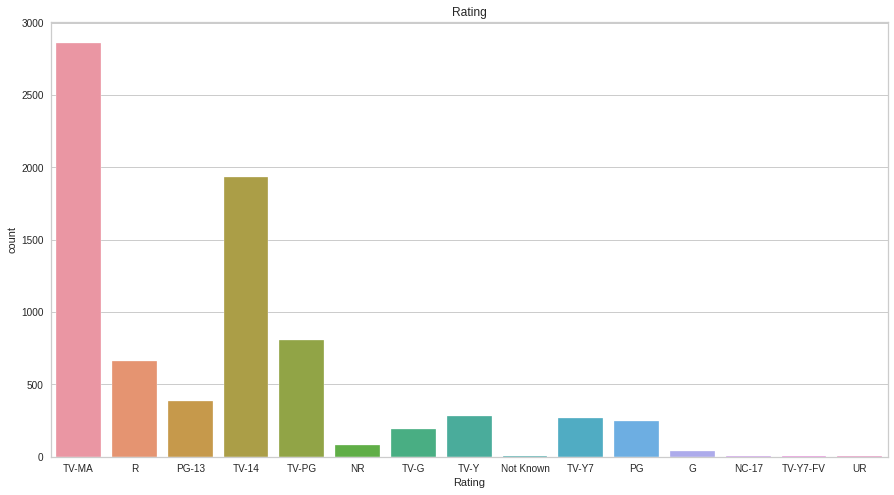

In [24]:
import seaborn as sns
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'rating',data = netflix_data)
ax.set_xlabel('Rating')
ax.set_title('Rating')
plt.show()

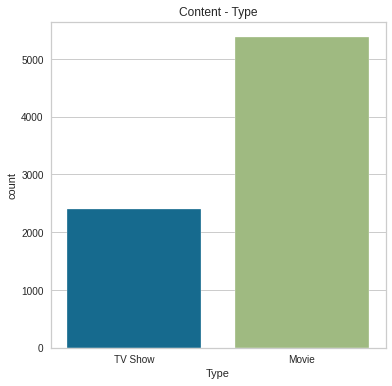

In [25]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x = 'type' ,data = netflix_data)
ax.set_xlabel('Type')
ax.set_title('Content - Type')
plt.show()

##**Word Cloud to check the frequency of the genre of the content available in netflix**

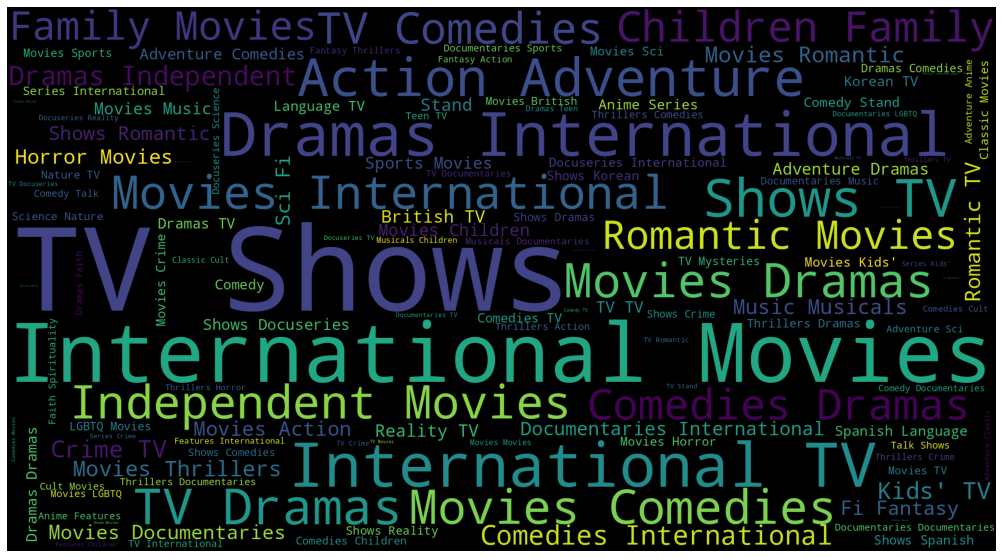

In [ ]:
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color='black', width=2000,height=1100).generate(" ".join(netflix_data[netflix_data['listed_in']!='Not known'].listed_in))                    
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##**Word cloud to check the most common countries**

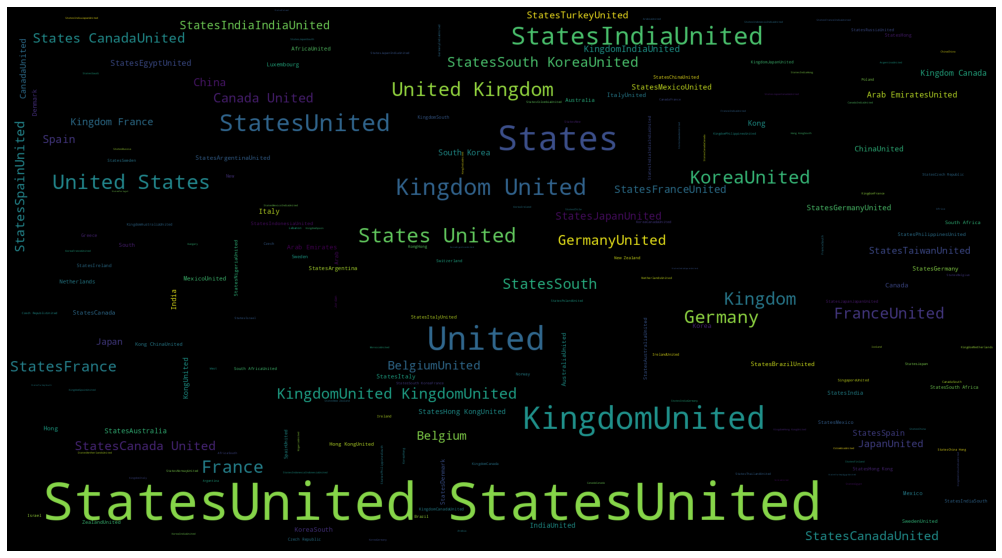

In [ ]:
plt.figure(figsize = (20,10))
wordcloud = WordCloud(background_color = 'black',width = 2000,height = 1100).generate("".join(netflix_data[netflix_data['country'] != 'Not Known']['country']))
# wordcloud = WordCloud(background_color='black', width=2000,height=1100).generate(" ".join(netflix_data[netflix_data['listed_in']!='Not known'].listed_in)) 
plt.imshow(wordcloud)
plt.axis(False)
plt.show()


In [26]:
netflix_data.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,TV Show,3%,Not Known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016


In [27]:
# checking different genre mentioned in 'listed in' column of dataframe

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
netflix_data['listed_in'].value_counts().index.values
all_genres = ""
for i in netflix_data['listed_in'].value_counts().index.values:
  all_genres  = all_genres + "," + i
all_genres = all_genres.split(',')
genres = [s.strip() for s in all_genres]
genres = np.unique(genres)
genres = list(genres)
genres.pop(0)
print('Combine genres list :')
genres

Combine genres list :


['Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers']

In [28]:
# creating separate columns for different genres
netflix_data['Action & Adventure'] = netflix_data['listed_in'].apply(lambda x : 1 if 'Action & Adventure' in x else 0)
netflix_data['Anime'] = netflix_data['listed_in'].apply(lambda x : 1 if 'Anime' in x else 0)
netflix_data['Children & Family'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Children & Family' in x  else 0)
netflix_data['Classic'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Classic' in x  else 0)
netflix_data['Comedy'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Comedy' in x or 'Comedies' in x else 0)
netflix_data['Crime'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Crime' in x  else 0)
netflix_data['Documentaries'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Documentaries' in x  else 0)
netflix_data['Horror'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Horror' in x  else 0)
netflix_data['Romantic'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Romantic' in x  else 0)
netflix_data['Science'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Sci-Fi' in x or 'Science' in x else 0)
netflix_data['Thriller'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Thriller' in x  else 0)
netflix_data['Drama'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Drama' in x  else 0)

**genre for movies and tv shows (content type)**

In [29]:
# genre for movies and tv shows (content type)
print("Anime category wise Movie and Tv show count",netflix_data.groupby(['type'])['Anime'].sum())
print("Science category wise Movie and Tv show count",netflix_data.groupby(['type'])['Science'].sum())
print("Action & Adventure category wise Movie and Tv show count",netflix_data.groupby(['type'])['Action & Adventure'].sum())
print("Children & Family category wise Movie and Tv show count",netflix_data.groupby(['type'])['Children & Family'].sum())
print("Classic category wise Movie and Tv show count",netflix_data.groupby(['type'])['Classic'].sum())
print("Comedy category wise Movie and Tv show count",netflix_data.groupby(['type'])['Comedy'].sum())
print("Crime category wise Movie and Tv show count",netflix_data.groupby(['type'])['Crime'].sum())
print("Horror category wise Movie and Tv show count",netflix_data.groupby(['type'])['Horror'].sum())
print("Documentaries' category wise Movie and Tv show count",netflix_data.groupby(['type'])['Documentaries'].sum())
print("Romantic category wise Movie and Tv show count",netflix_data.groupby(['type'])['Romantic'].sum())
print("Thriller category wise Movie and Tv show count",netflix_data.groupby(['type'])['Thriller'].sum())
print("Drama category wise Movie and Tv show count",netflix_data.groupby(['type'])['Drama'].sum())
     

Anime category wise Movie and Tv show count type
Movie       57
TV Show    148
Name: Anime, dtype: int64
Science category wise Movie and Tv show count type
Movie      218
TV Show    161
Name: Science, dtype: int64
Action & Adventure category wise Movie and Tv show count type
Movie      721
TV Show    150
Name: Action & Adventure, dtype: int64
Children & Family category wise Movie and Tv show count type
Movie      532
TV Show      0
Name: Children & Family, dtype: int64
Classic category wise Movie and Tv show count type
Movie      103
TV Show     27
Name: Classic, dtype: int64
Comedy category wise Movie and Tv show count type
Movie      1800
TV Show     544
Name: Comedy, dtype: int64
Crime category wise Movie and Tv show count type
Movie        0
TV Show    427
Name: Crime, dtype: int64
Horror category wise Movie and Tv show count type
Movie      312
TV Show     69
Name: Horror, dtype: int64
Documentaries' category wise Movie and Tv show count type
Movie      786
TV Show      0
Name: Do

## **visualization of the genre and respective content type count**

Text(0.5, 1.0, 'Genre Distribution of Drama')

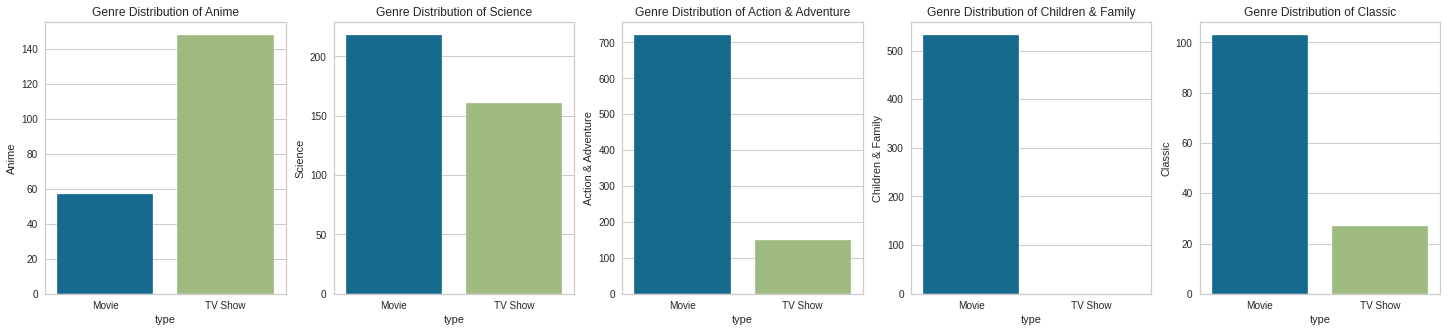

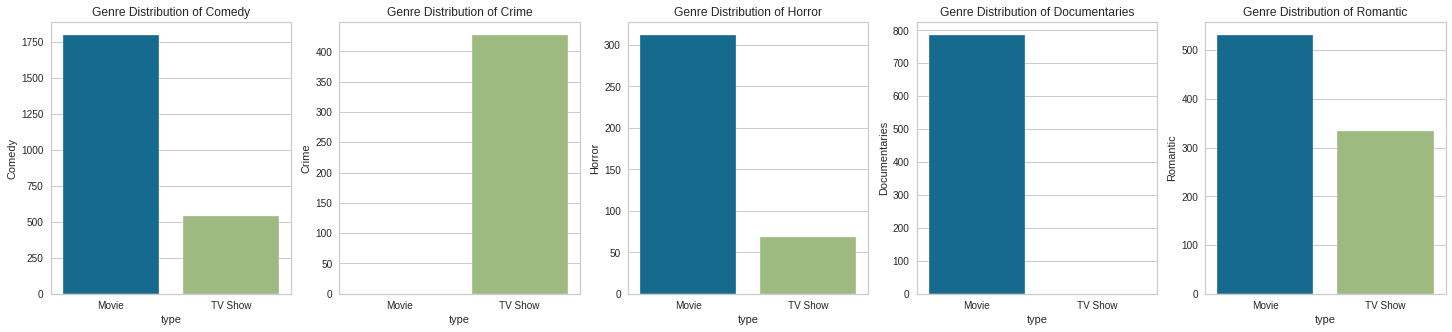

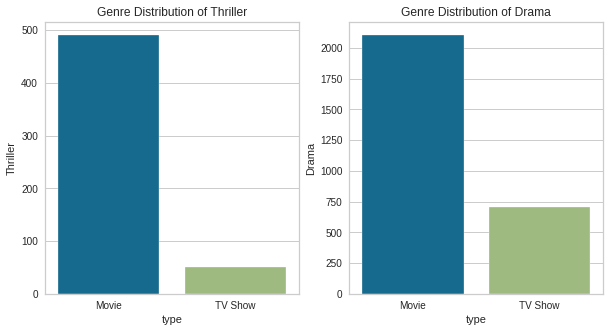

In [30]:
# visualization of the genre and respective content type count
fig,ax = plt.subplots(1,5,figsize = (25,5))
# visualization of the genre and respective Anime type count
df1 =pd.DataFrame(netflix_data.groupby('type')['Anime'].sum()).reset_index()
sns.barplot(x = 'type',y = 'Anime', data = df1, ax = ax[0])
ax[0].set_title("Genre Distribution of Anime")

# visualization of the genre and respective Science type count
df2 =pd.DataFrame(netflix_data.groupby('type')['Science'].sum()).reset_index()
sns.barplot(x='type',y= 'Science',data=df2,ax=ax[1])
ax[1].set_title("Genre Distribution of Science")

# visualization of the genre and respective Action & Adventure type count
df3 =pd.DataFrame(netflix_data.groupby('type')['Action & Adventure'].sum()).reset_index()
sns.barplot(x='type',y= 'Action & Adventure',data=df3,ax=ax[2])
ax[2].set_title("Genre Distribution of Action & Adventure")

# visualization of the genre and respective Children & Family type count
df4 =pd.DataFrame(netflix_data.groupby('type')['Children & Family'].sum()).reset_index()
sns.barplot(x='type',y= 'Children & Family',data=df4,ax=ax[3])
ax[3].set_title("Genre Distribution of Children & Family")

# visualization of the genre and respective Classic type count
df5 =pd.DataFrame(netflix_data.groupby('type')['Classic'].sum()).reset_index()
sns.barplot(x='type',y= 'Classic',data=df5,ax=ax[4])
ax[4].set_title("Genre Distribution of Classic")

fig,ax = plt.subplots(1,5, figsize = (25,5))

# visualization of the genre and respective Comedy type count
df6 =pd.DataFrame(netflix_data.groupby('type')['Comedy'].sum()).reset_index()
sns.barplot(x='type',y= 'Comedy',data=df6,ax=ax[0])
ax[0].set_title("Genre Distribution of Comedy")


# visualization of the genre and respective Crime type count
df7 =pd.DataFrame(netflix_data.groupby('type')['Crime'].sum()).reset_index()
sns.barplot(x='type',y= 'Crime',data=df7,ax=ax[1])
ax[1].set_title("Genre Distribution of Crime")

# visualization of the genre and respective Horror type count
df8 =pd.DataFrame(netflix_data.groupby('type')['Horror'].sum()).reset_index()
sns.barplot(x='type',y= 'Horror',data=df8,ax=ax[2])
ax[2].set_title("Genre Distribution of Horror")

# visualization of the genre and respective Documentaries type count
df9 =pd.DataFrame(netflix_data.groupby('type')['Documentaries'].sum()).reset_index()
sns.barplot(x='type',y= 'Documentaries',data=df9,ax=ax[3])
ax[3].set_title("Genre Distribution of Documentaries")

# visualization of the genre and respective Romantic type count
df10 =pd.DataFrame(netflix_data.groupby('type')['Romantic'].sum()).reset_index()
sns.barplot(x='type',y= 'Romantic',data=df10,ax=ax[4])
ax[4].set_title("Genre Distribution of Romantic")


fig,ax = plt.subplots(1,2, figsize = (10,5))
# visualization of the genre and respective Thriller type count
df11 =pd.DataFrame(netflix_data.groupby('type')['Thriller'].sum()).reset_index()
sns.barplot(x='type',y= 'Thriller',data=df11,ax=ax[0])
ax[0].set_title("Genre Distribution of Thriller")


# visualization of the genre and respective Drama type count
df12 =pd.DataFrame(netflix_data.groupby('type')['Drama'].sum()).reset_index()
sns.barplot(x='type',y= 'Drama',data=df12,ax=ax[1])
ax[1].set_title("Genre Distribution of Drama")


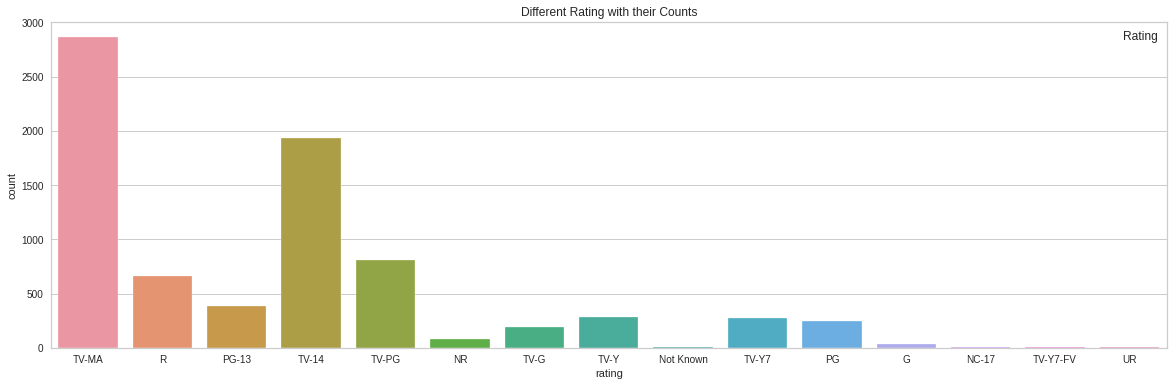

In [31]:
plt.figure(figsize = (20,6))
ax = sns.countplot(x = 'rating' , data = netflix_data)
ax.legend(title="Rating", loc="upper right")
ax.set_title('Different Rating with their Counts')
plt.show()

## **creating separate column and plotting for checking if content is season wise or not**

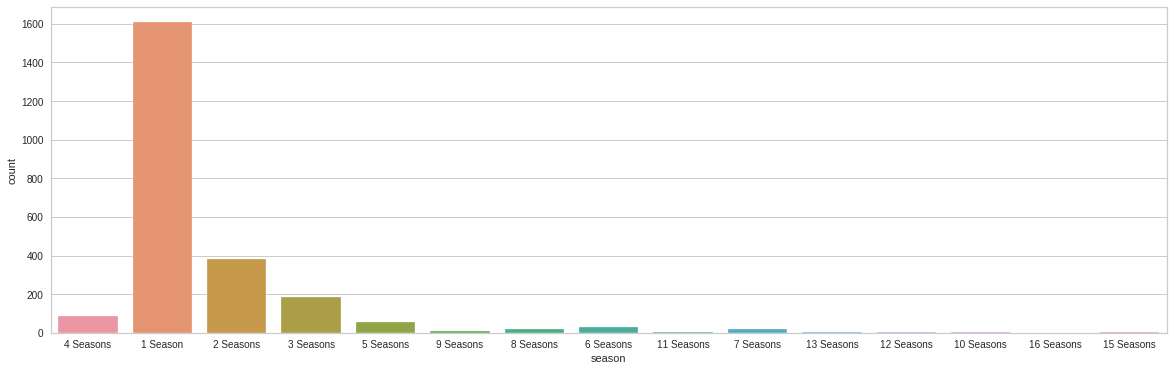

In [32]:
#creating separate column and plotting for checking if content is season wise or not
Season_list = []
for item in netflix_data['duration'].values:
  if 'Season' in item:
    Season_list.append(item)
Season_list = pd.DataFrame(Season_list, columns= ['season'])
plt.figure(figsize = (20,6))
sns.countplot(x = 'season', data =Season_list)
plt.show()



netflix_data['Season_wise_content'] = netflix_data['duration'].apply(lambda x: 'yes' if 'Season' in x else 'no')

In [33]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# function to get country names for different content type
def countries_name_having_content_type(data):
  data['country'].value_counts().index.values
  all_countries = ""
  for country in data['country'].value_counts().index.values:
     all_countries = all_countries + "," + country
  all_countries = all_countries.split(",")
  countries = [item.strip() for item in all_countries]
  countries = np.unique(countries)
  countries = list(countries)
  countries.pop(0)
  return countries



In [34]:
# calling function countries_name_having_content_type for data which contains only TV Show related records
country_having_type_TV_Show = countries_name_having_content_type(netflix_data[netflix_data['type'] == 'TV Show'])
print("Total no of countries in dataset for content type as movies: ",len(country_having_type_TV_Show))
print("unique country list for Movie content type : \n ")
print(country_having_type_TV_Show)

Total no of countries in dataset for content type as movies:  66
unique country list for Movie content type : 
 
['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kuwait', 'Lebanon', 'Luxembourg', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Not Known', 'Pakistan', 'Philippines', 'Poland', 'Puerto Rico', 'Russia', 'Saudi Arabia', 'Senegal', 'Singapore', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'West Germany']


In [35]:
# calling function countries_name_having_content_type for data which contains only movies related records
country_having_type_Movie = countries_name_having_content_type(netflix_data[netflix_data['type'] == 'Movie'])
print("Total no of countries in dataset for content type as movies: ",len(country_having_type_Movie))
print("unique country list for Movie content type : \n ")
print(country_having_type_Movie)

Total no of countries in dataset for content type as movies:  111
unique country list for Movie content type : 
 
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas', 'Bangladesh', 'Belgium', 'Bermuda', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Croatia', 'Czech Republic', 'Denmark', 'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Not Known', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Po

In [36]:
# printing the common countries having both content type
print("Common countries for Tv shows and movie content both:")
print('Number of countries having both types are :',len(list(set(country_having_type_Movie).intersection(country_having_type_TV_Show))))
print(list(set(country_having_type_Movie).intersection(country_having_type_TV_Show)))

Common countries for Tv shows and movie content both:
Number of countries having both types are : 59
['Pakistan', 'West Germany', 'Australia', 'China', 'Lebanon', 'Norway', 'United Kingdom', 'Mexico', 'Italy', 'United Arab Emirates', 'Belgium', 'Germany', 'Croatia', 'Brazil', 'Senegal', 'Ukraine', 'France', 'United States', 'Japan', 'Chile', 'Thailand', 'Argentina', 'Colombia', 'Greece', 'Malta', 'Hungary', 'Poland', 'Saudi Arabia', 'Kuwait', 'Finland', 'Indonesia', 'Jordan', 'South Korea', 'Luxembourg', 'Spain', 'Hong Kong', 'New Zealand', 'Turkey', 'Netherlands', 'South Africa', 'Ireland', 'Switzerland', 'Not Known', 'Singapore', 'Iceland', 'Nigeria', 'Israel', 'Egypt', 'Malaysia', 'Austria', 'Philippines', 'Taiwan', 'Canada', 'Russia', 'Uruguay', 'India', 'Sweden', 'Czech Republic', 'Denmark']


In [37]:
# printing countries which contains only movie related content

onlymovie_countries = [x for x in country_having_type_Movie if x not in country_having_type_TV_Show]
print("No of countries with only movie type content ",len(onlymovie_countries))
print("List of countries with movie type content only \n",onlymovie_countries)

No of countries with only movie type content  52
List of countries with movie type content only 
 ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Bahamas', 'Bangladesh', 'Bermuda', 'Botswana', 'Bulgaria', 'Cambodia', 'Cayman Islands', 'Dominican Republic', 'East Germany', 'Ecuador', 'Georgia', 'Ghana', 'Guatemala', 'Iran', 'Iraq', 'Jamaica', 'Kazakhstan', 'Kenya', 'Latvia', 'Liechtenstein', 'Lithuania', 'Malawi', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Portugal', 'Qatar', 'Romania', 'Samoa', 'Serbia', 'Slovakia', 'Slovenia', 'Somalia', 'Soviet Union', 'Sri Lanka', 'Sudan', 'Uganda', 'Vatican City', 'Venezuela', 'Vietnam', 'Zimbabwe']


In [38]:
# printing countries which contains only Tv show related content

onlytvshow_countries = [x for x in country_having_type_TV_Show if x not in country_having_type_Movie]
print("No of countries with only Tv show type content",len(onlytvshow_countries))
print("List of countries with TV show type content only \n",onlytvshow_countries)
     

No of countries with only Tv show type content 7
List of countries with TV show type content only 
 ['Azerbaijan', 'Belarus', 'Cuba', 'Cyprus', 'Mauritius', 'Puerto Rico', 'Syria']


## ***Bar plot to check the content type across some of the countries***

<Axes: xlabel='type', ylabel='Country_Spain'>

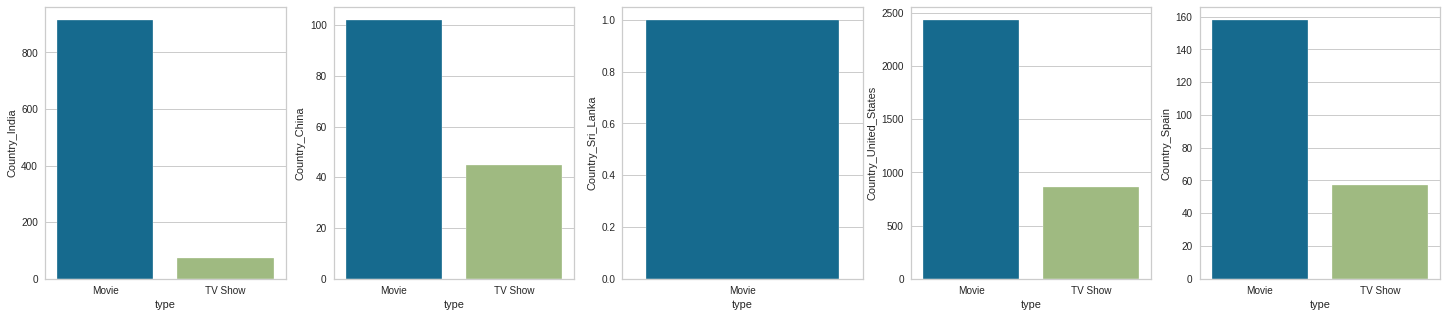

In [39]:
fig,ax = plt.subplots(1,5,figsize = (25,5))

indian_content = netflix_data[netflix_data['country'].str.contains('India')]
indian_content =pd.DataFrame(indian_content.groupby('type')['country'].count()).reset_index()
indian_content.rename(columns ={'country':'Country_India'},inplace =True)
sns.barplot(x='type',y= 'Country_India',data=indian_content,ax=ax[0])

China_content = netflix_data[netflix_data['country'].str.contains('China')]
China_content =pd.DataFrame(China_content.groupby('type')['country'].count()).reset_index()
China_content.rename(columns ={'country':'Country_China'},inplace =True)
sns.barplot(x='type',y= 'Country_China',data=China_content,ax=ax[1])

SriLanka_content = netflix_data[netflix_data['country'].str.contains('Sri Lanka')]
SriLanka_content =pd.DataFrame(SriLanka_content.groupby('type')['country'].count()).reset_index()
SriLanka_content.rename(columns ={'country':'Country_Sri_Lanka'},inplace =True)
sns.barplot(x='type',y= 'Country_Sri_Lanka',data=SriLanka_content,ax=ax[2])

United_States_content = netflix_data[netflix_data['country'].str.contains('United States')]
United_States_content =pd.DataFrame(United_States_content.groupby('type')['country'].count()).reset_index()
United_States_content.rename(columns ={'country':'Country_United_States'},inplace =True)
sns.barplot(x='type',y= 'Country_United_States',data=United_States_content,ax=ax[3])

Spain_content = netflix_data[netflix_data['country'].str.contains('Spain')]
Spain_content =pd.DataFrame(Spain_content.groupby('type')['country'].count()).reset_index()
Spain_content.rename(columns ={'country':'Country_Spain'},inplace =True)
sns.barplot(x='type',y= 'Country_Spain',data=Spain_content,ax=ax[4])

<Axes: xlabel='type', ylabel='Country_United Kingdom'>

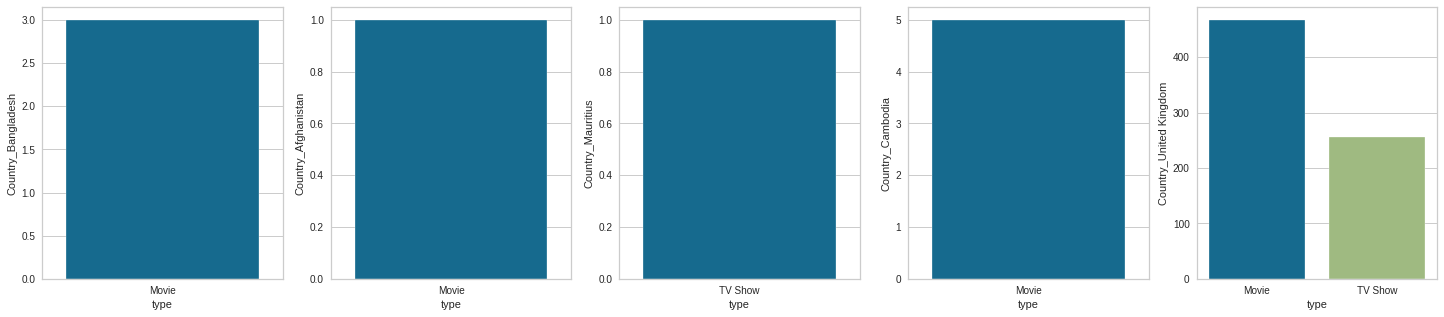

In [40]:

# visualizing content type country wise

fig, ax = plt.subplots(1,5, figsize=(25,5))
indian_content = netflix_data[netflix_data['country'].str.contains('Bangladesh')]
indian_content =pd.DataFrame(indian_content.groupby('type')['country'].count()).reset_index()
indian_content.rename(columns ={'country':'Country_Bangladesh'},inplace =True)
sns.barplot(x='type',y= 'Country_Bangladesh',data=indian_content,ax=ax[0])

China_content = netflix_data[netflix_data['country'].str.contains('Afghanistan')]
China_content =pd.DataFrame(China_content.groupby('type')['country'].count()).reset_index()
China_content.rename(columns ={'country':'Country_Afghanistan'},inplace =True)
sns.barplot(x='type',y= 'Country_Afghanistan',data=China_content,ax=ax[1])

SriLanka_content = netflix_data[netflix_data['country'].str.contains('Mauritius')]
SriLanka_content =pd.DataFrame(SriLanka_content.groupby('type')['country'].count()).reset_index()
SriLanka_content.rename(columns ={'country':'Country_Mauritius'},inplace =True)
sns.barplot(x='type',y= 'Country_Mauritius',data=SriLanka_content,ax=ax[2])

United_States_content = netflix_data[netflix_data['country'].str.contains('Cambodia')]
United_States_content =pd.DataFrame(United_States_content.groupby('type')['country'].count()).reset_index()
United_States_content.rename(columns ={'country':'Country_Cambodia'},inplace =True)
sns.barplot(x='type',y= 'Country_Cambodia',data=United_States_content,ax=ax[3])

Spain_content = netflix_data[netflix_data['country'].str.contains('United Kingdom')]
Spain_content =pd.DataFrame(Spain_content.groupby('type')['country'].count()).reset_index()
Spain_content.rename(columns ={'country':'Country_United Kingdom'},inplace =True)
sns.barplot(x='type',y= 'Country_United Kingdom',data=Spain_content,ax=ax[4])

In [41]:
# content type vs year when data was added to netflix
added_year_df = pd.DataFrame(netflix_data.groupby(['added_year','type'])['type'].count())
added_year_df.rename(columns = {'type' : 'num_of_counts'},inplace = True)
added_year_df = added_year_df.reset_index()
added_year_df


,added_year,type,num_of_counts
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,6


##**scatter plot to check the content type for different years when the data was added to netflix**

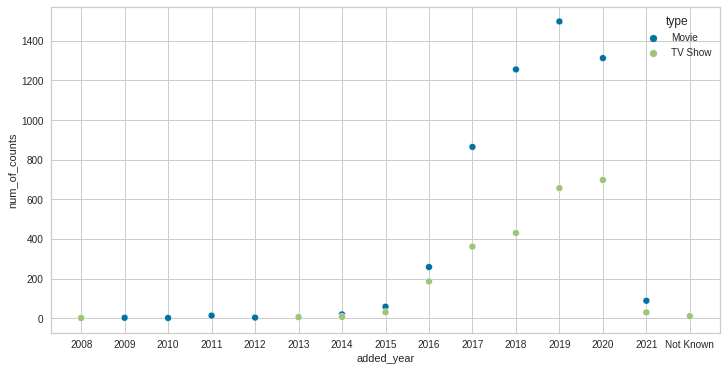

In [ ]:
# Scatter plot to visualize type of content  added per year 
plt.figure(figsize = (12,6))
ax = sns.scatterplot(x ='added_year',y = 'num_of_counts',hue = 'type', data = added_year_df)

In [ ]:
netflix_data.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,Action & Adventure,Anime,Children & Family,Classic,Comedy,Crime,Documentaries,Horror,Romantic,Science,Thriller,Drama,Season_wise_content
0,TV Show,3%,Not Known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,0,0,0,0,0,0,0,0,0,1,0,1,yes


In [ ]:
def popular_Genres_Different_Countries(country_name):
  netflix_data_india = netflix_data[netflix_data['country'].str.contains(country_name)]
  netflix_data_india_list = []
  for item_list in netflix_data_india['listed_in']:
    for item in item_list.split(","):
      netflix_data_india_list.append(item)

  netflix_data_india_list_df = pd.DataFrame(netflix_data_india_list,columns = ['movie_type']).value_counts().head(7)
  df_india = pd.DataFrame(netflix_data_india_list_df,columns = ['count']).reset_index()
  plt.figure(figsize = (15,10))
  ax = sns.barplot( x = 'movie_type', y = 'count', data = df_india)
  ax.set_title(f'Most popular Genres {country_name}')    

<ipython-input-45-c22a6e7c536c>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (15,10))


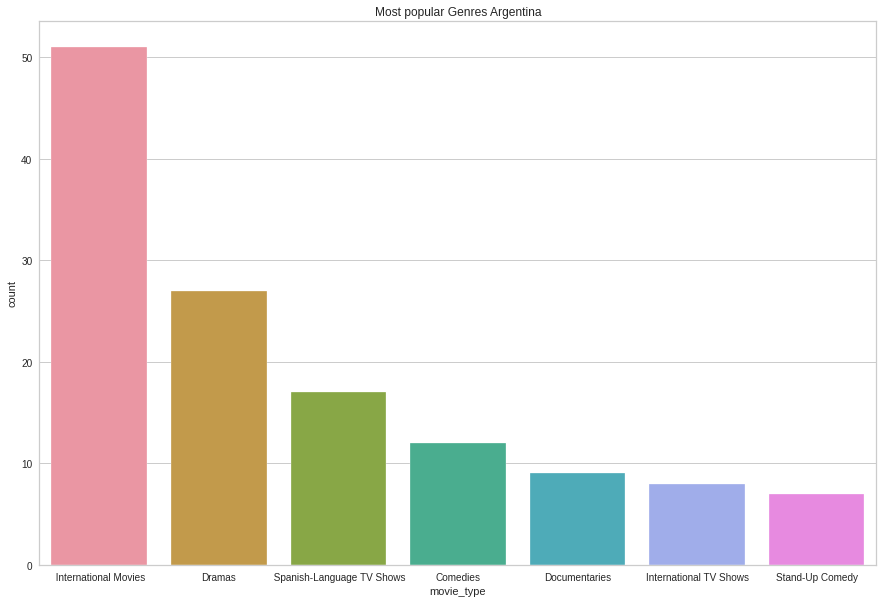

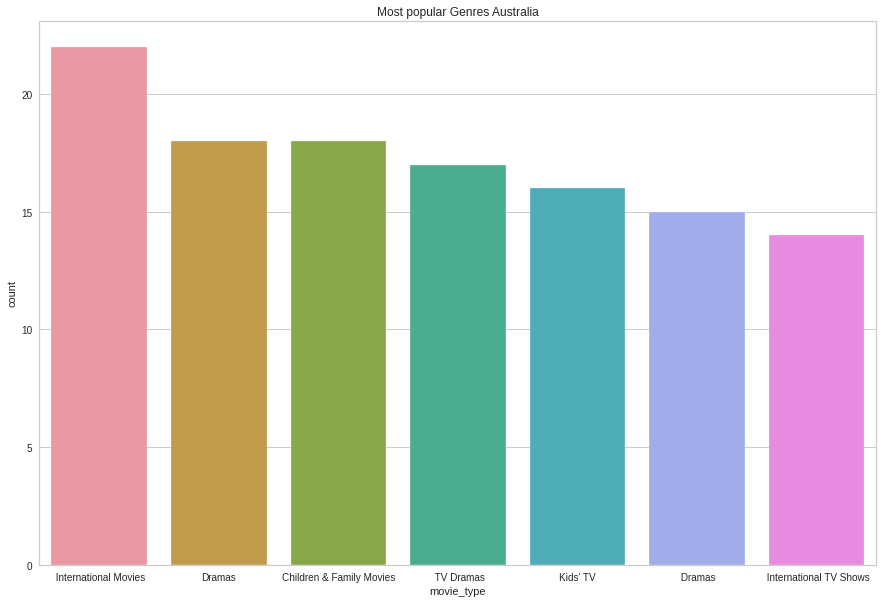

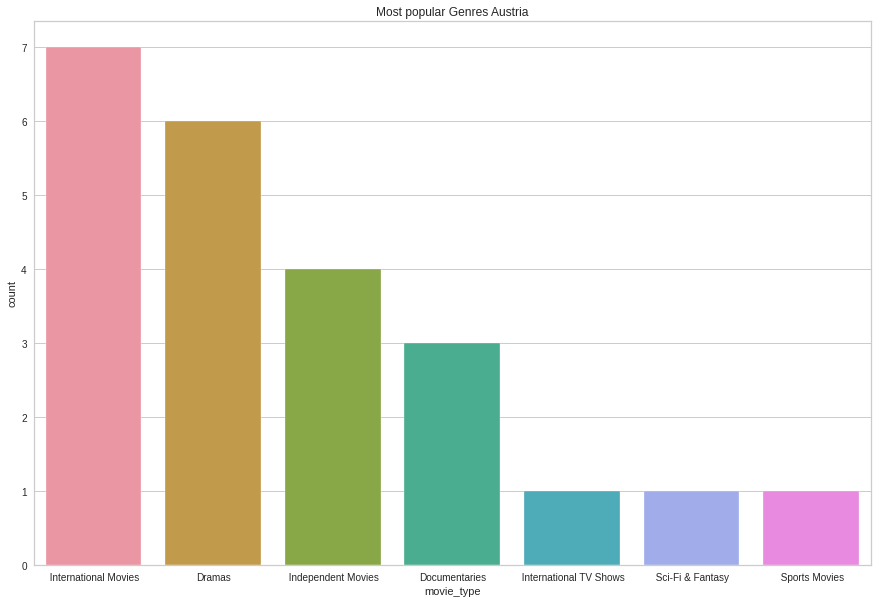

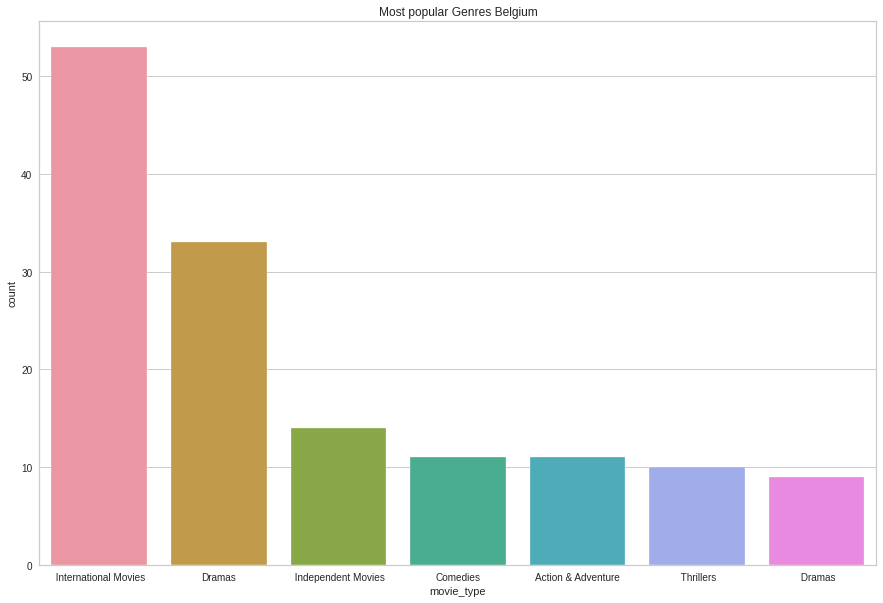

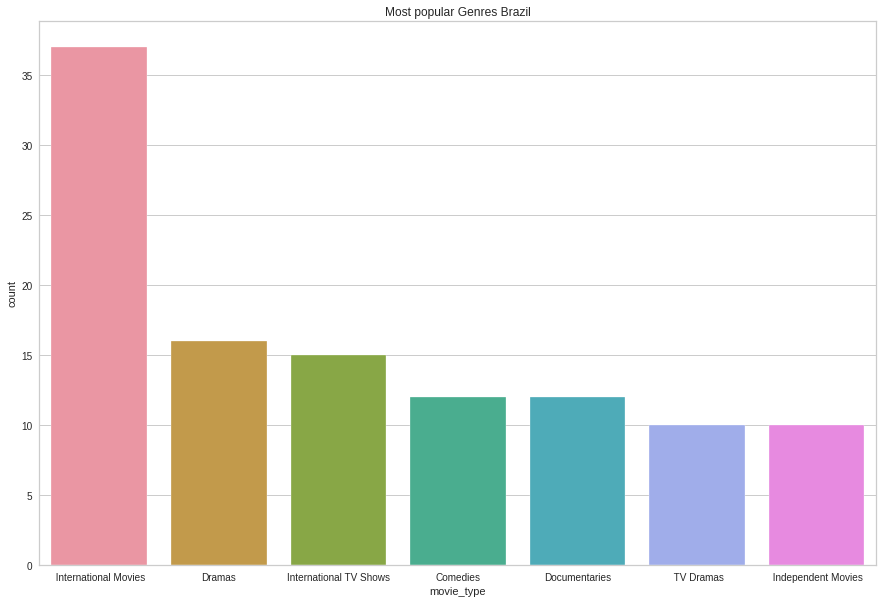

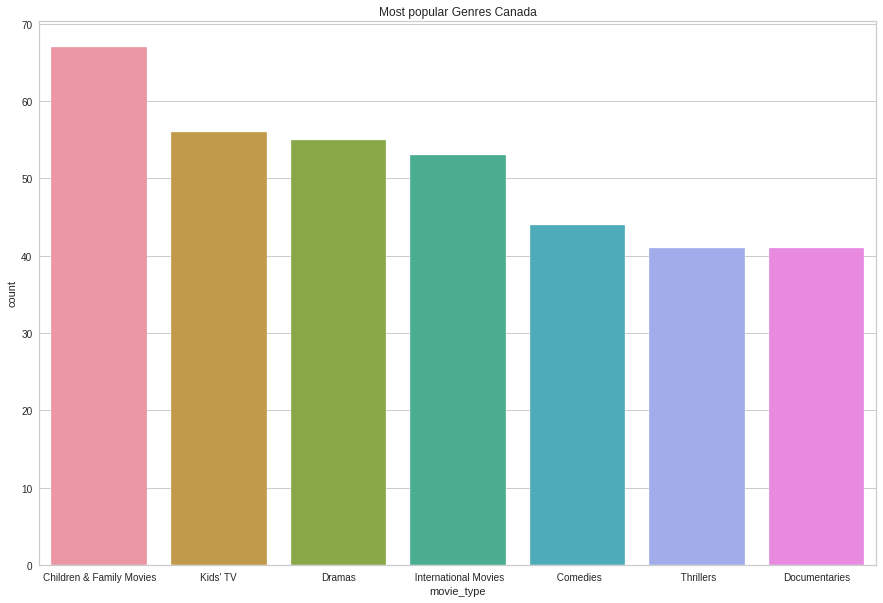

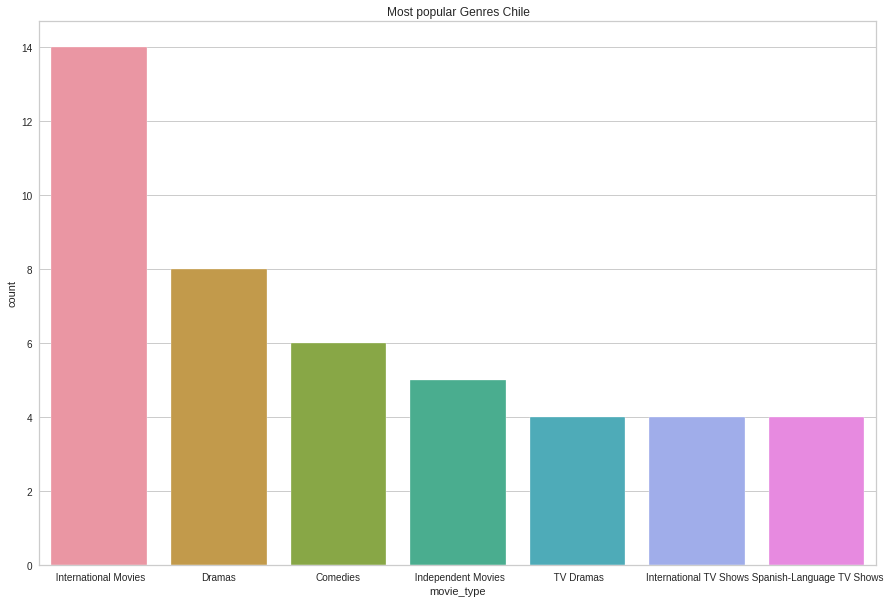

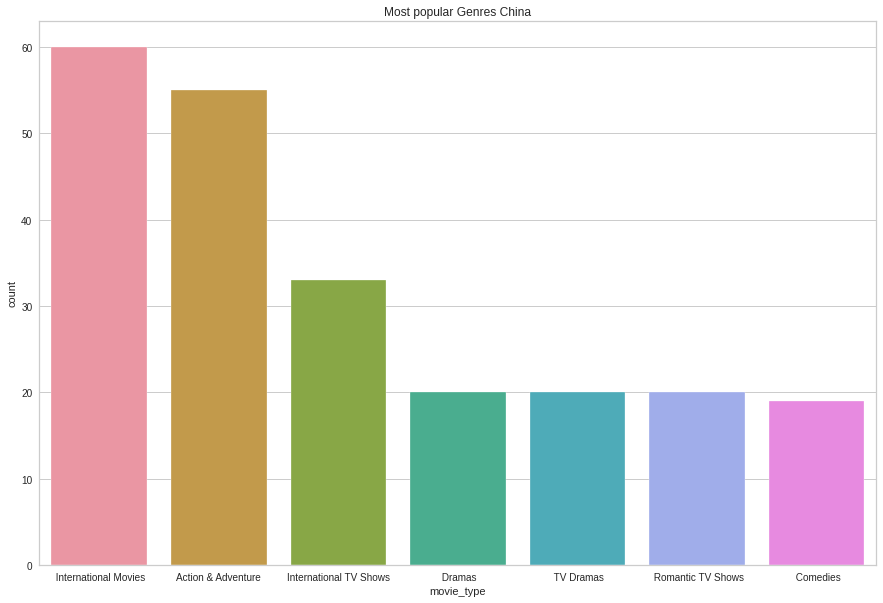

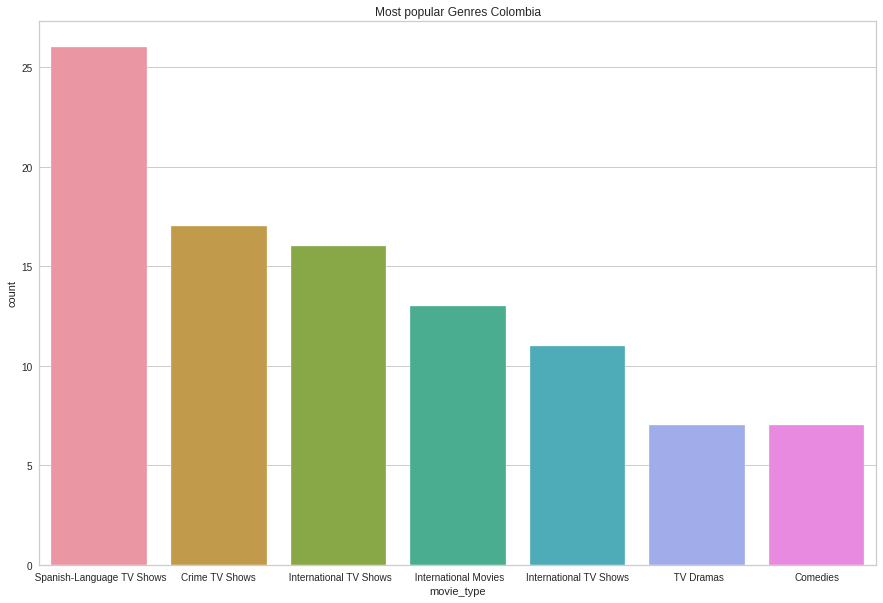

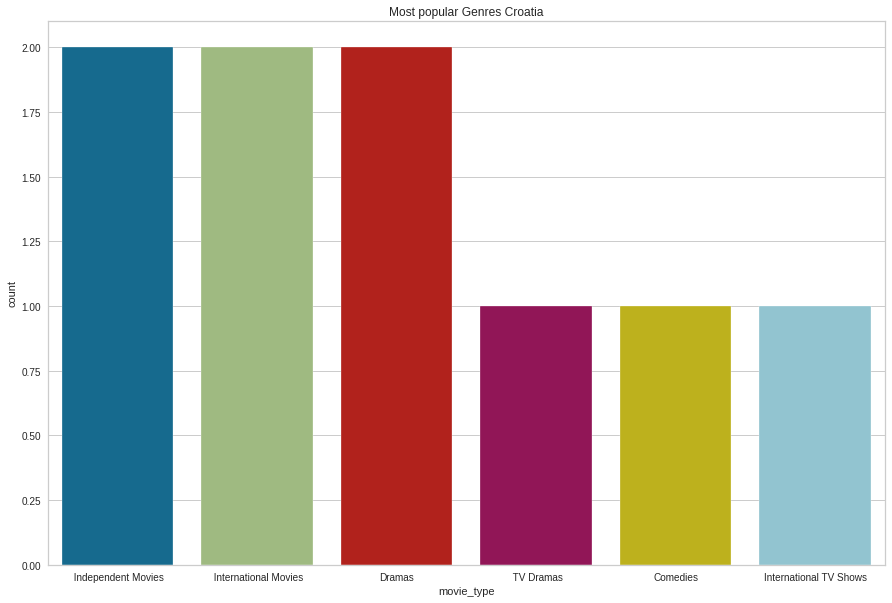

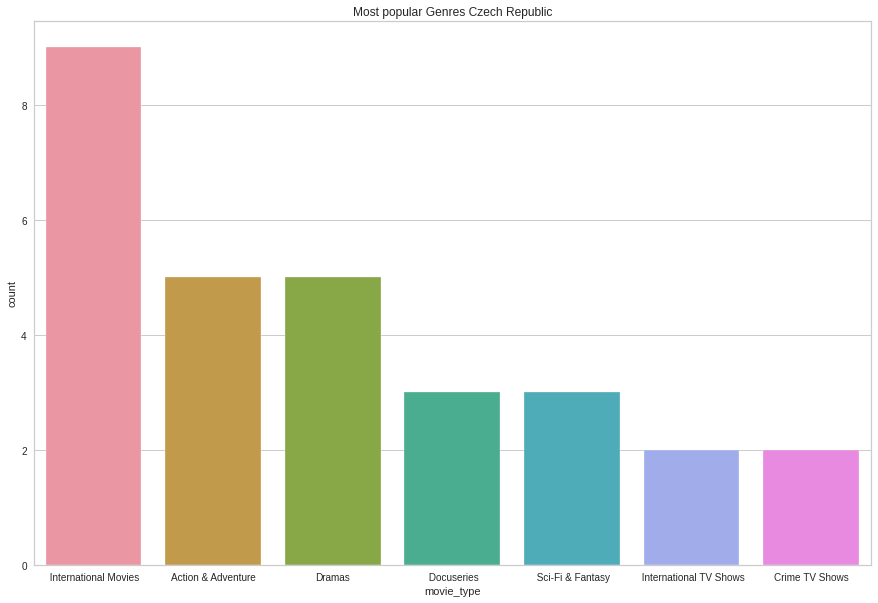

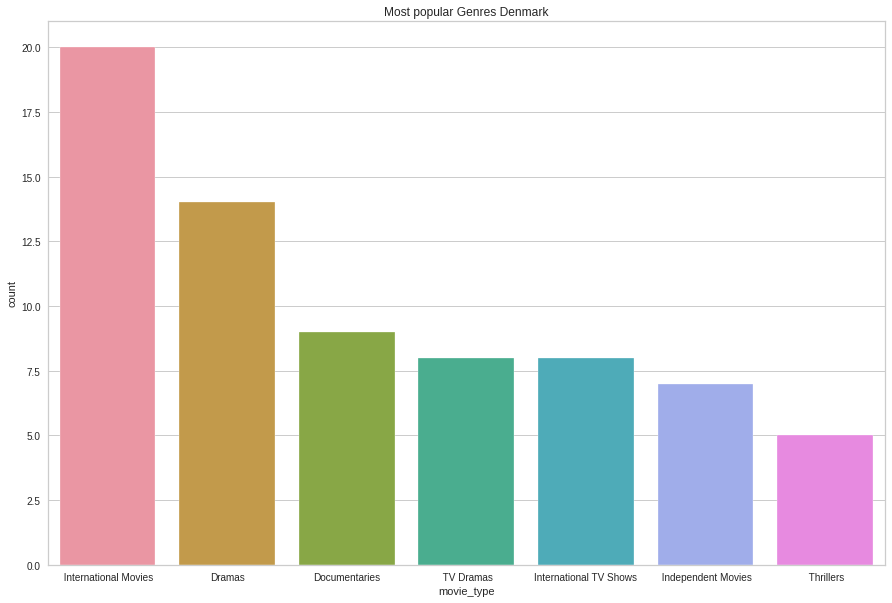

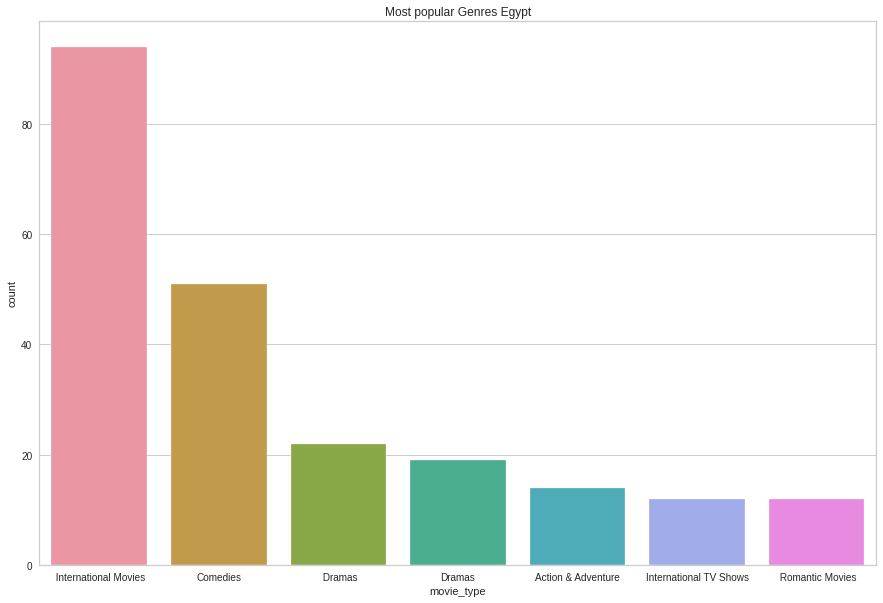

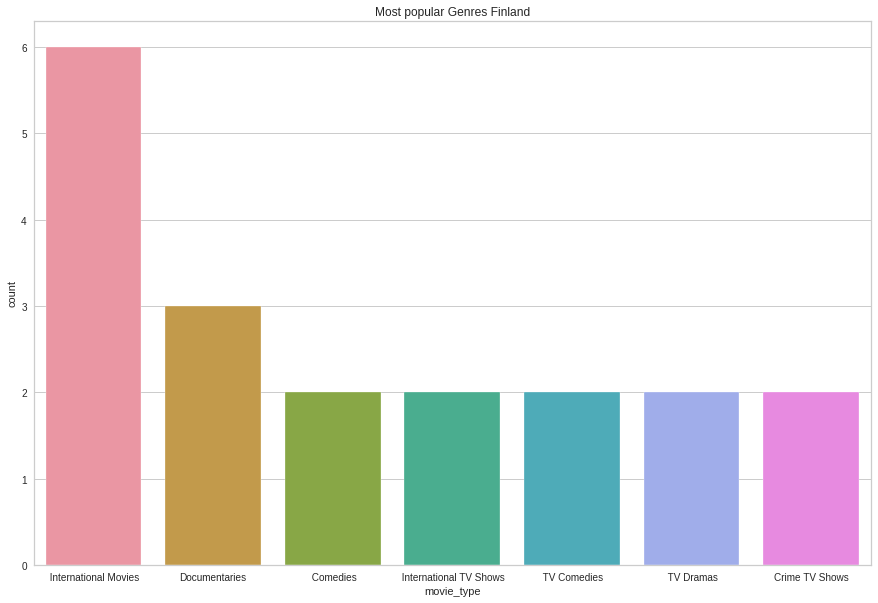

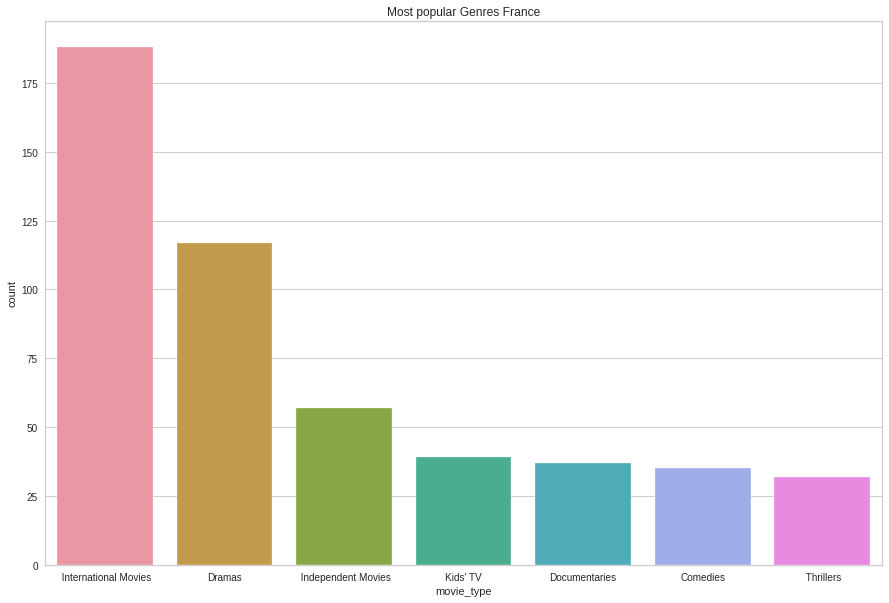

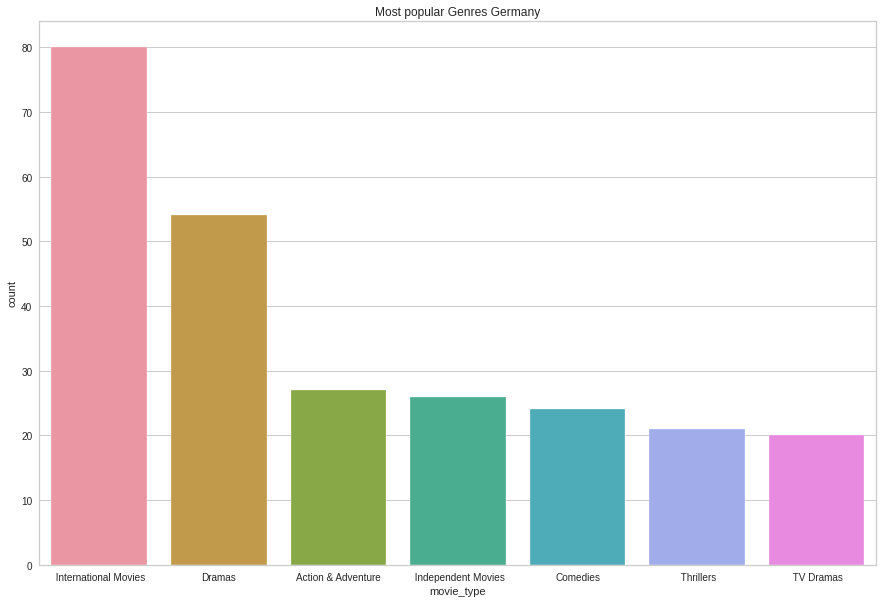

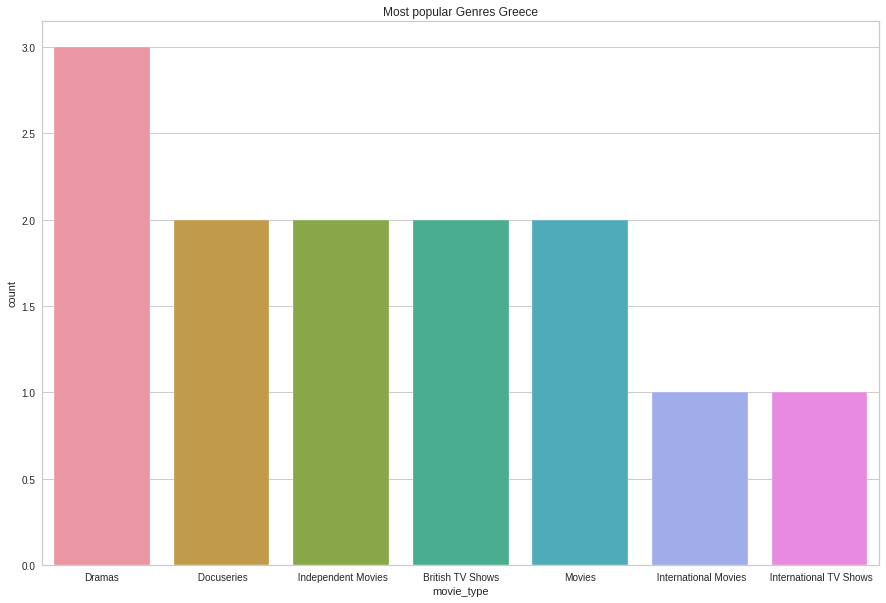

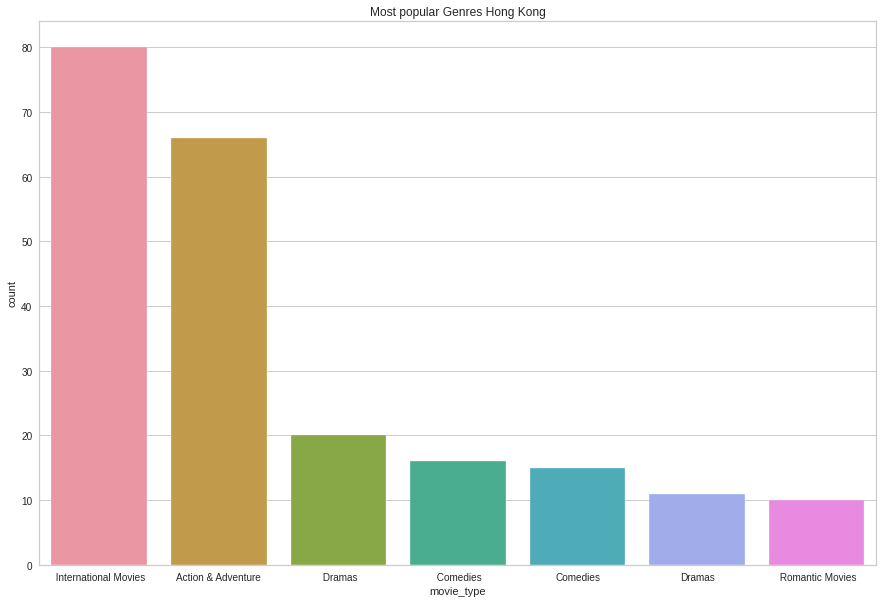

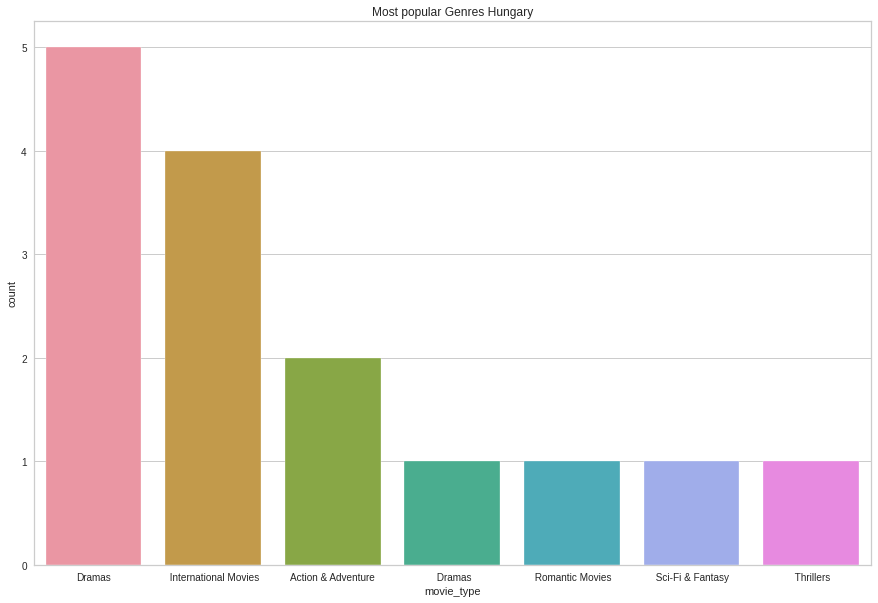

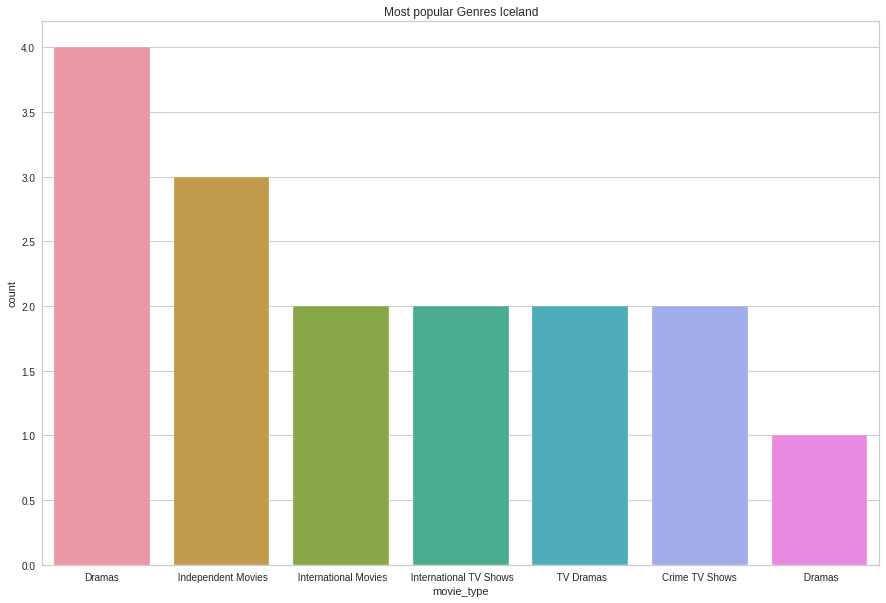

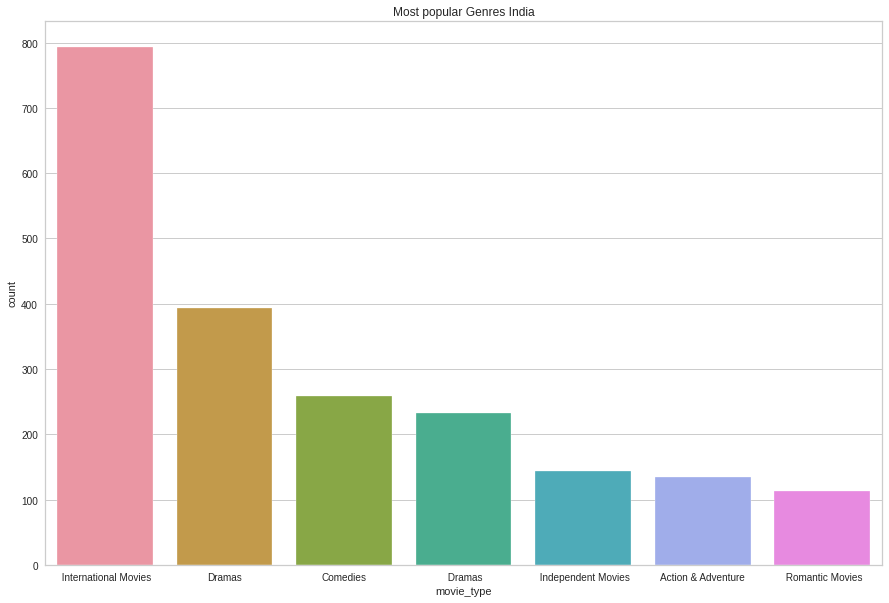

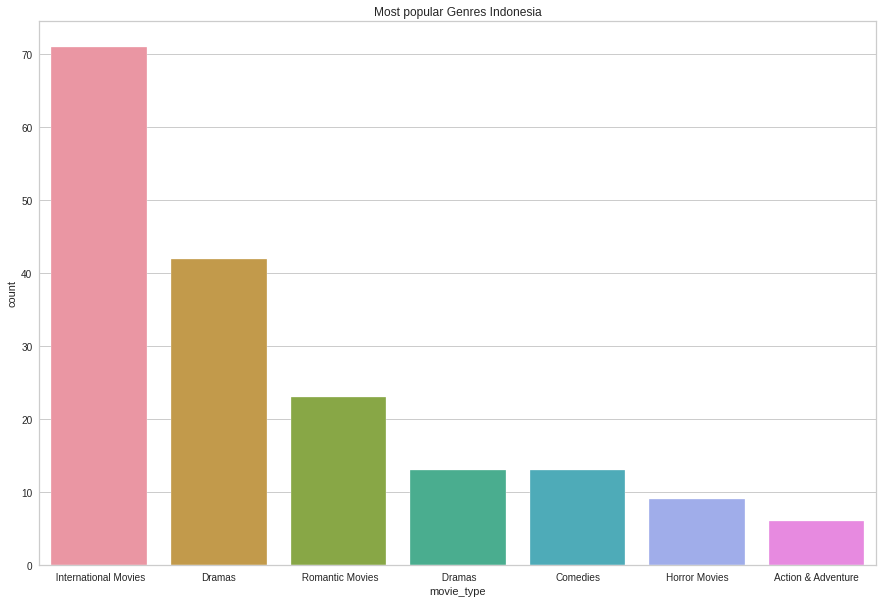

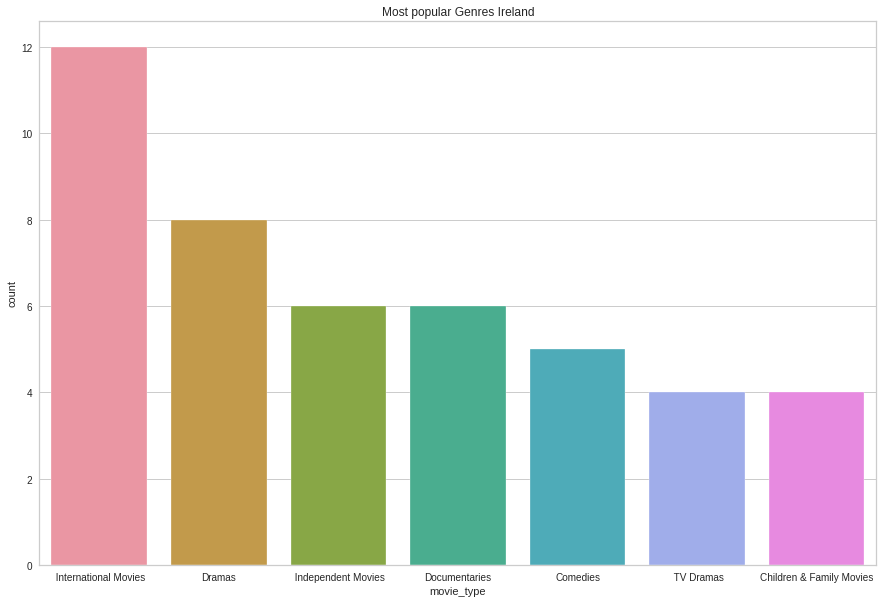

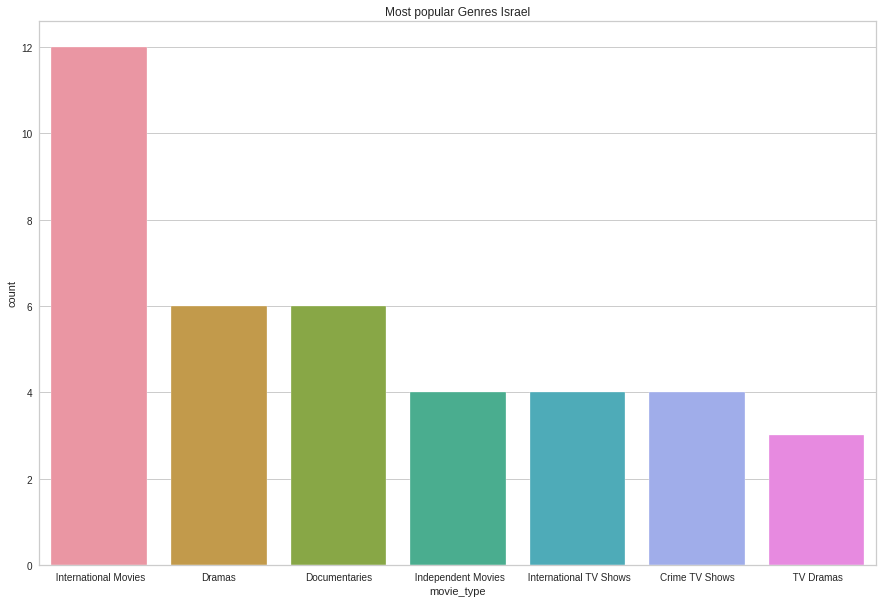

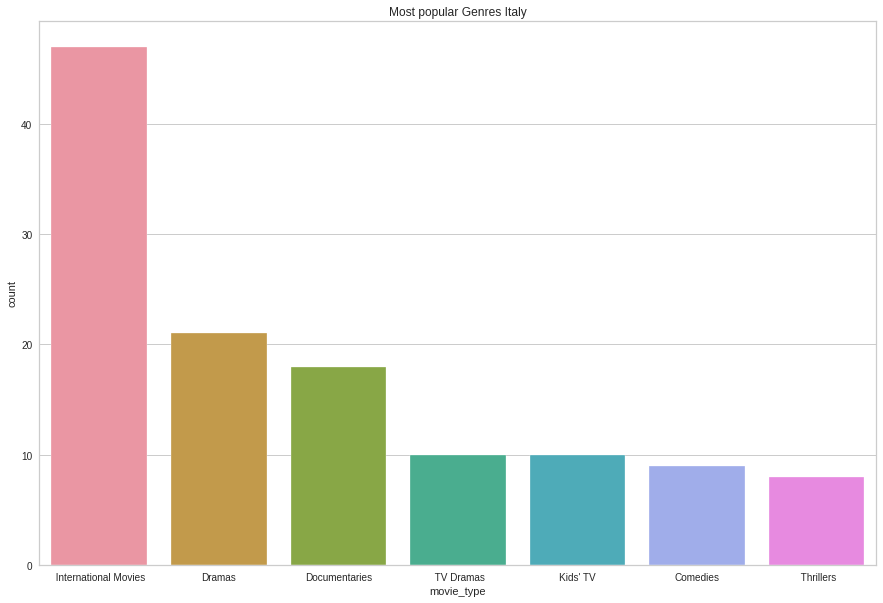

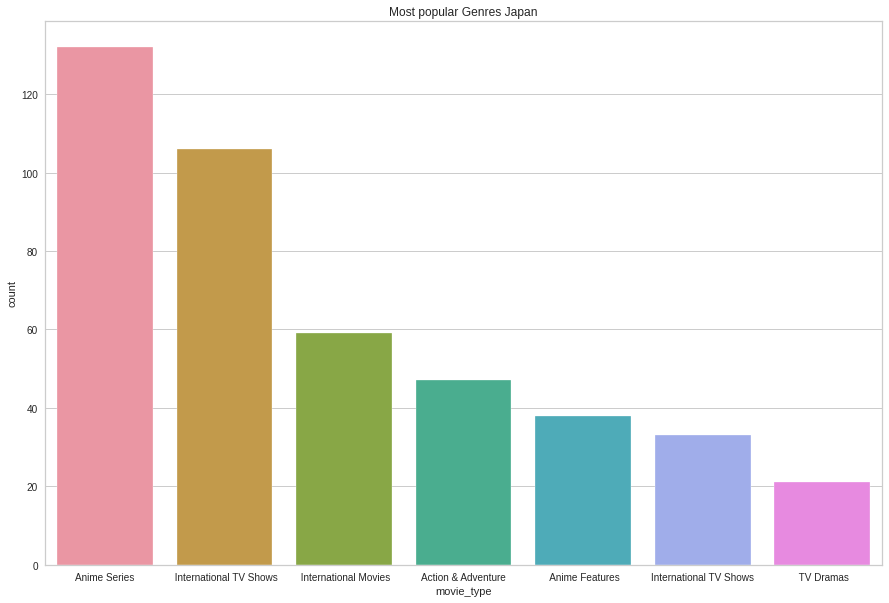

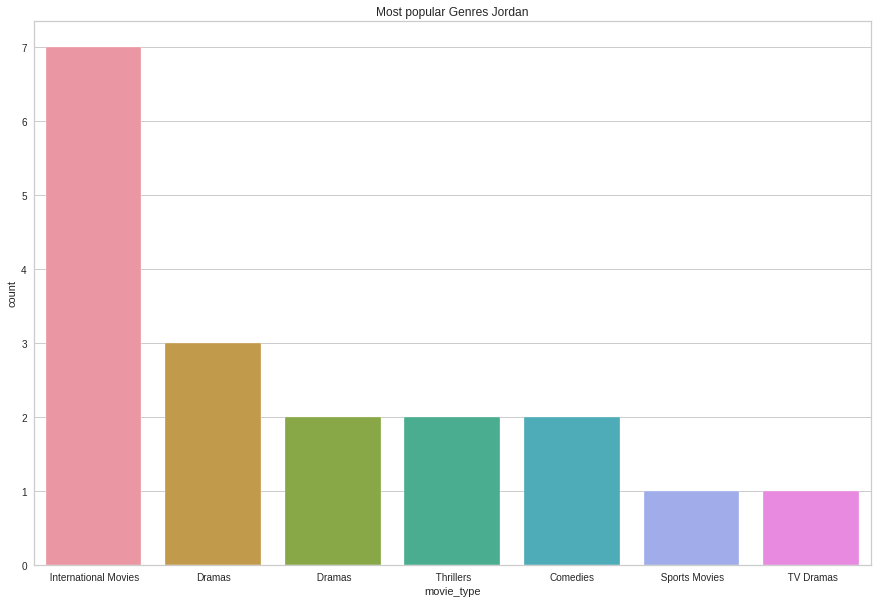

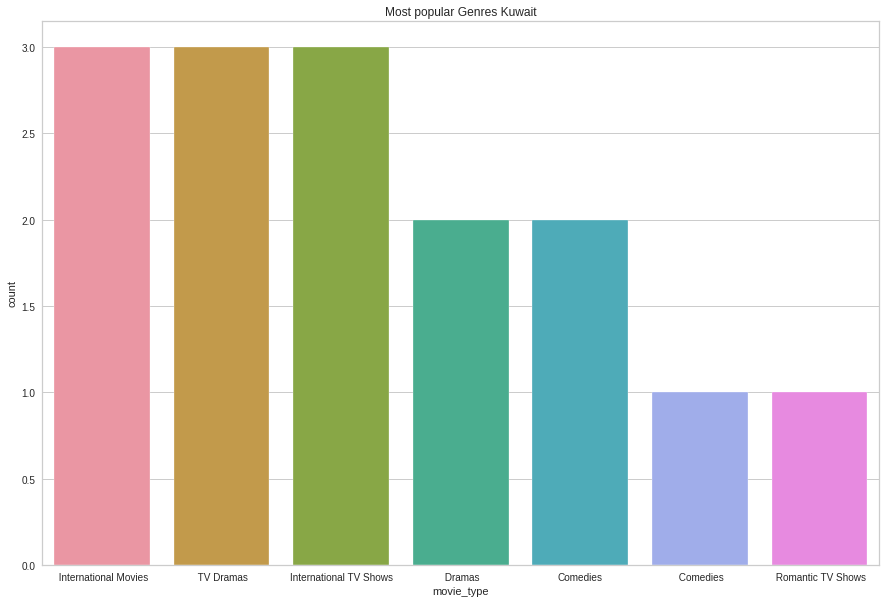

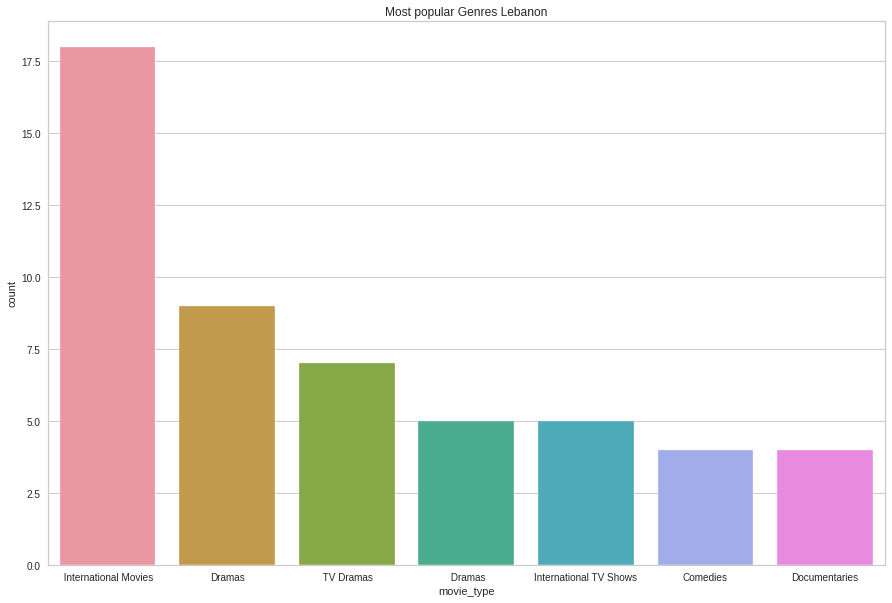

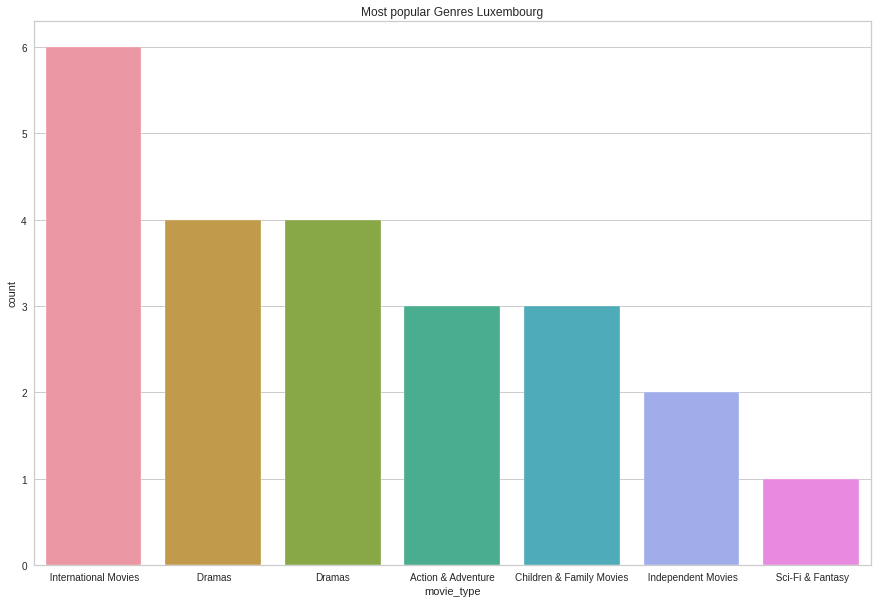

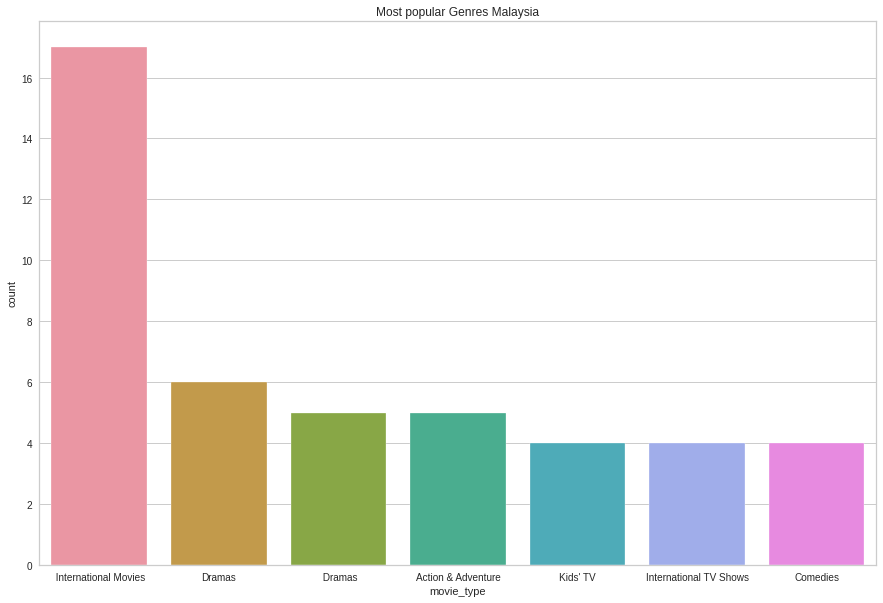

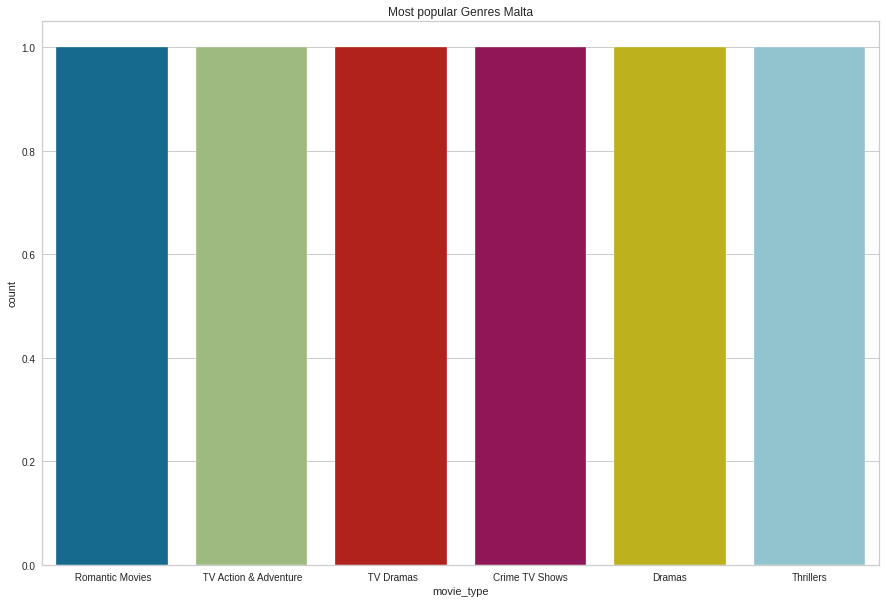

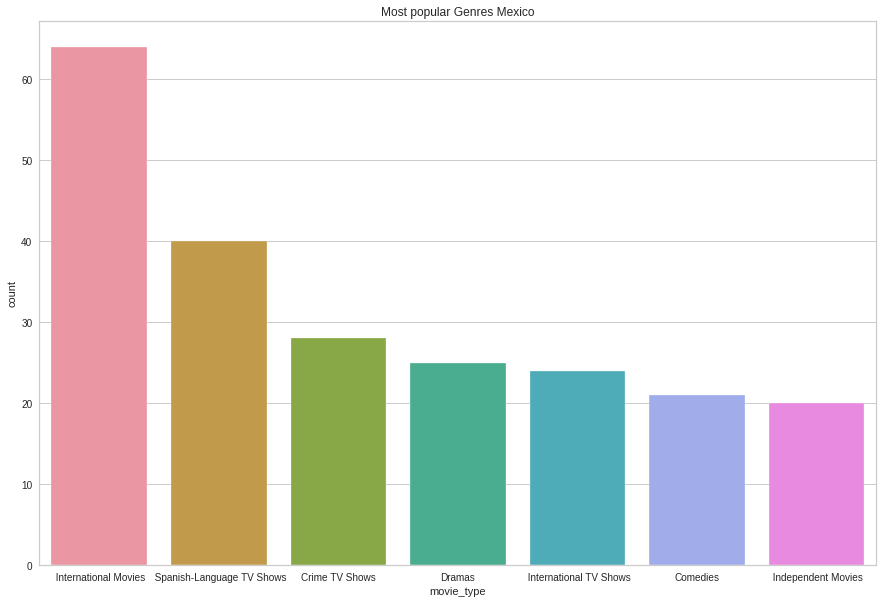

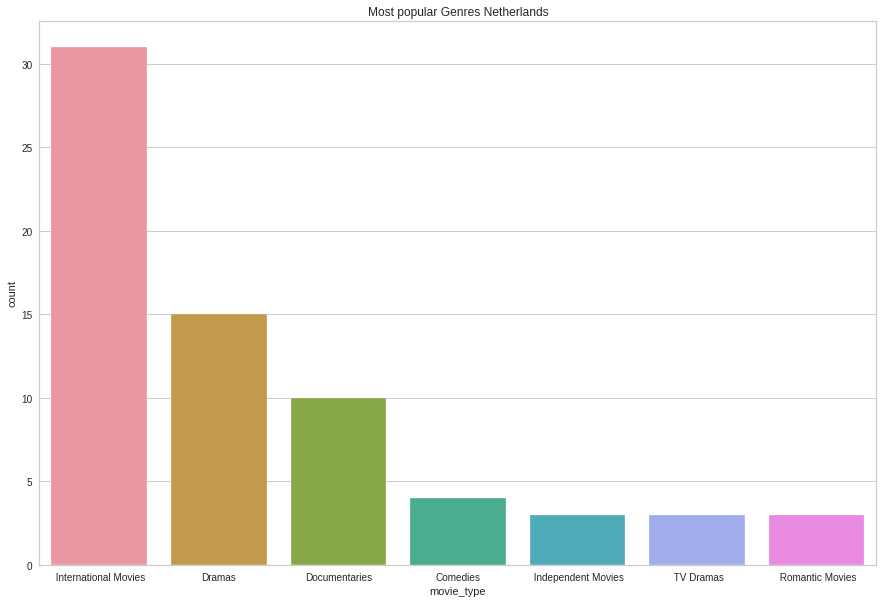

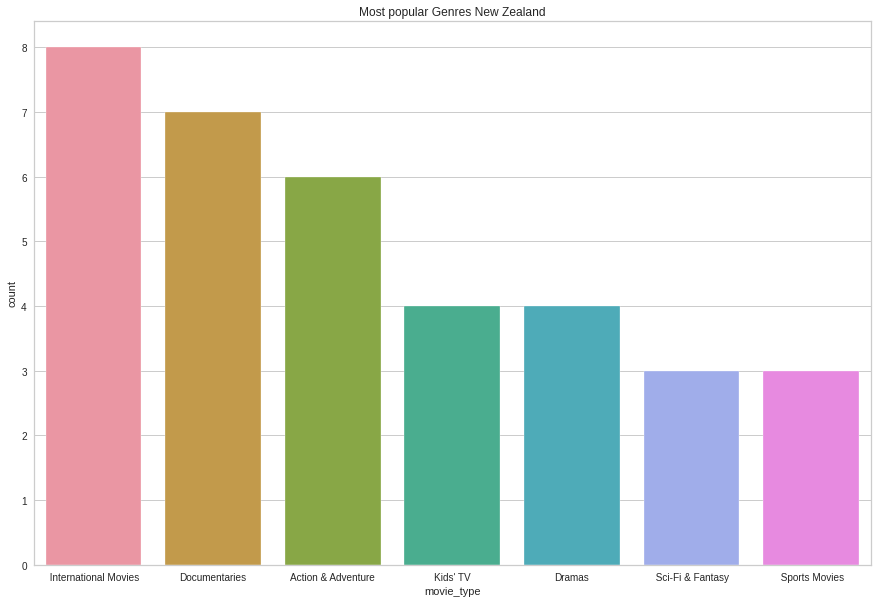

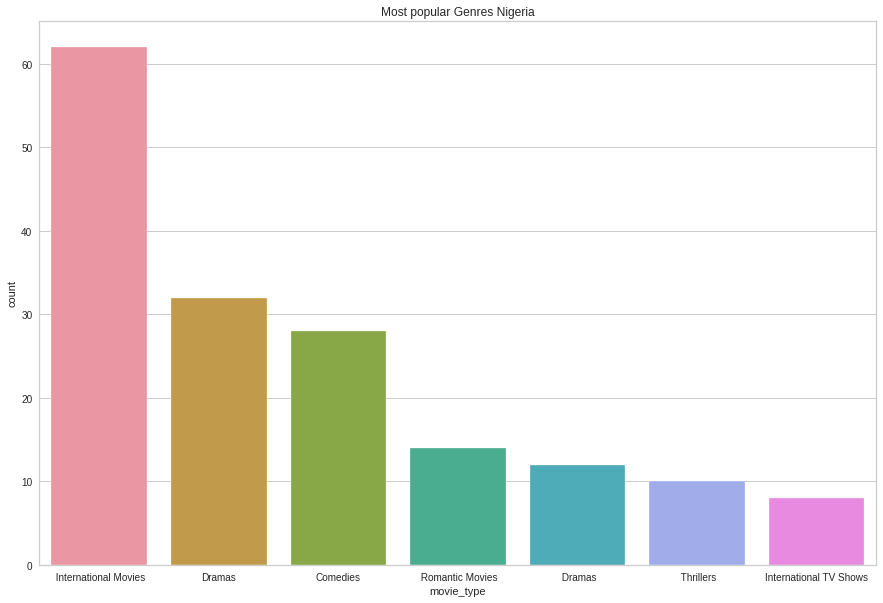

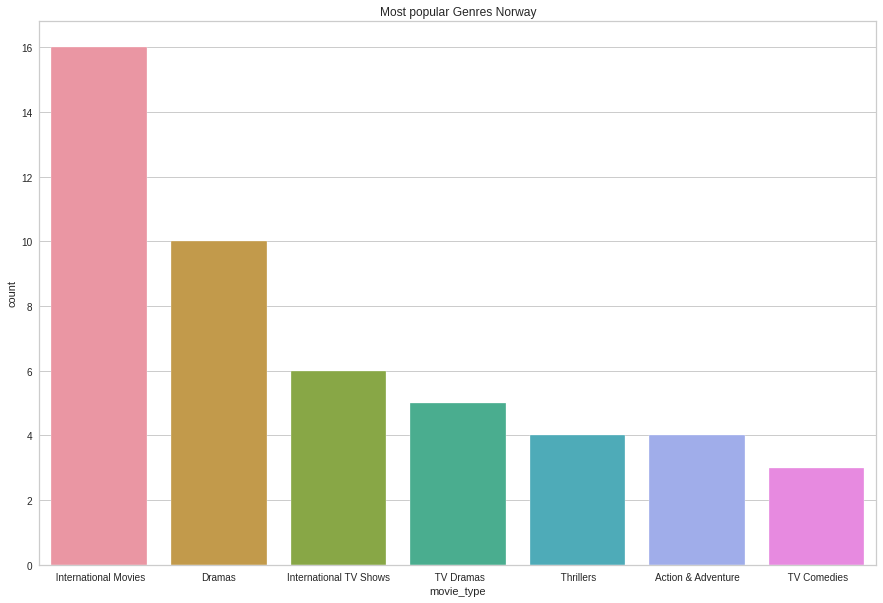

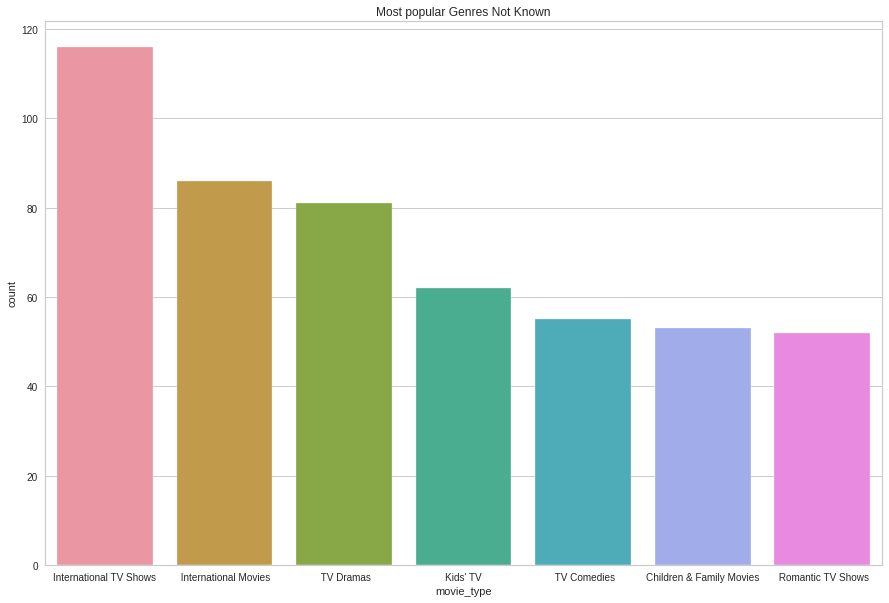

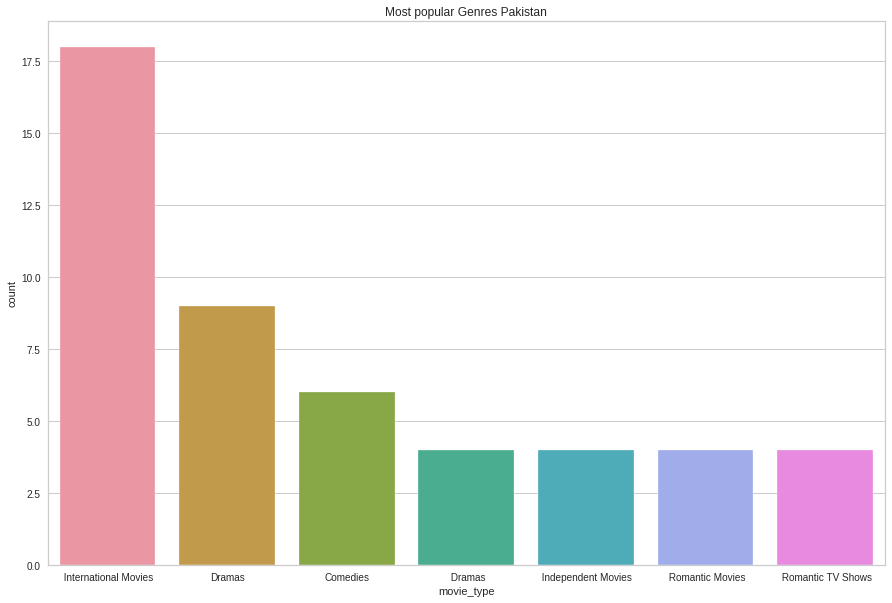

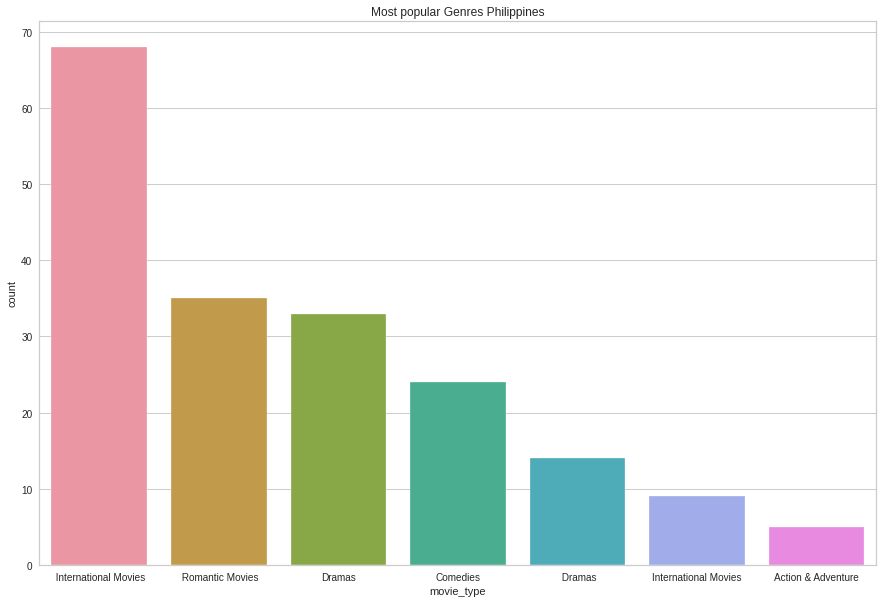

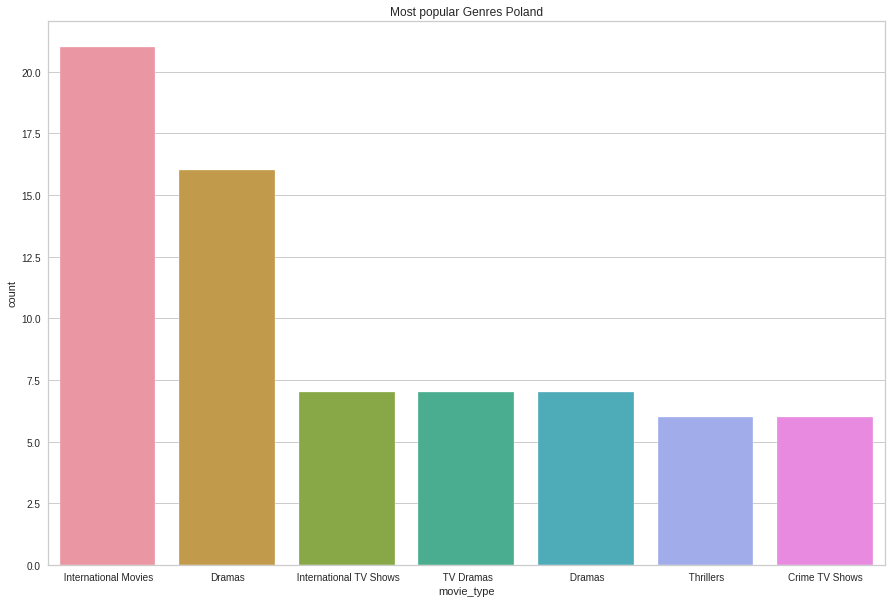

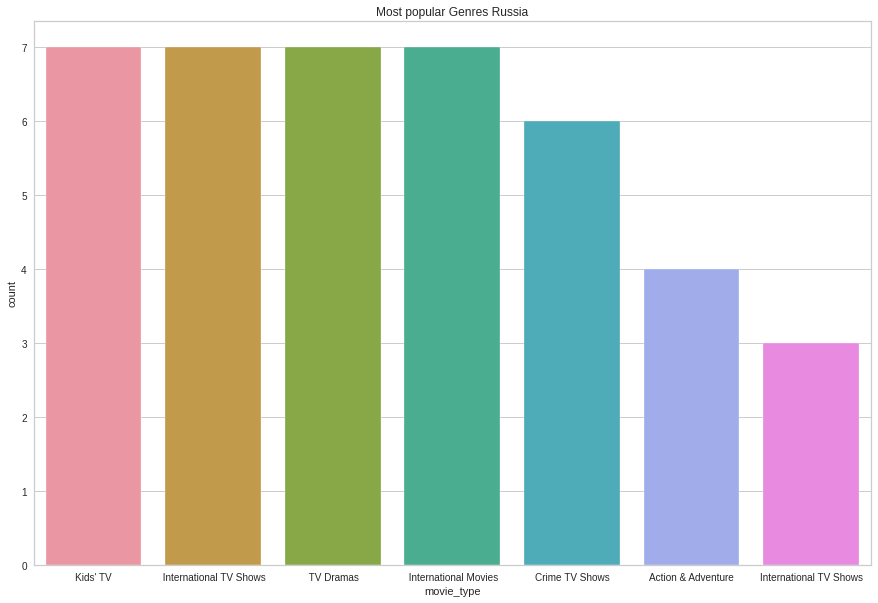

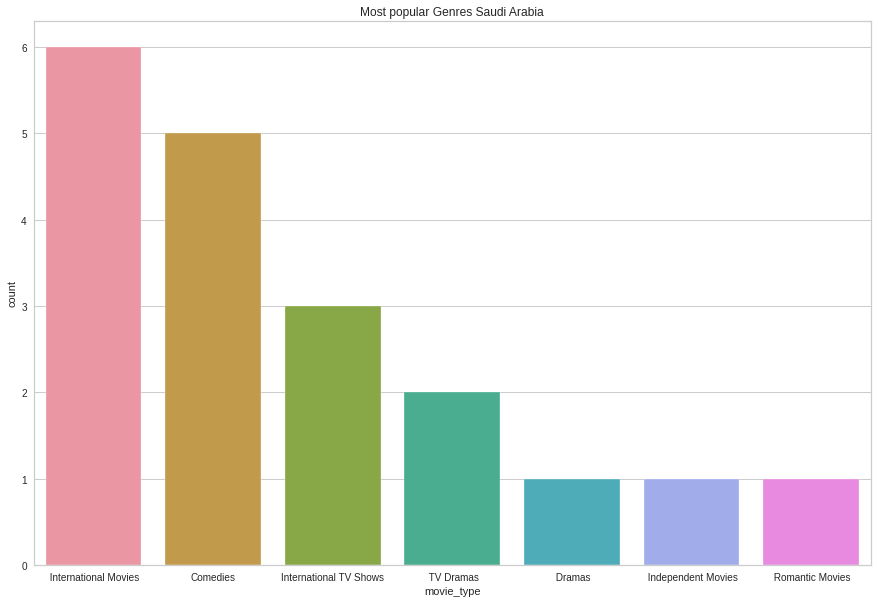

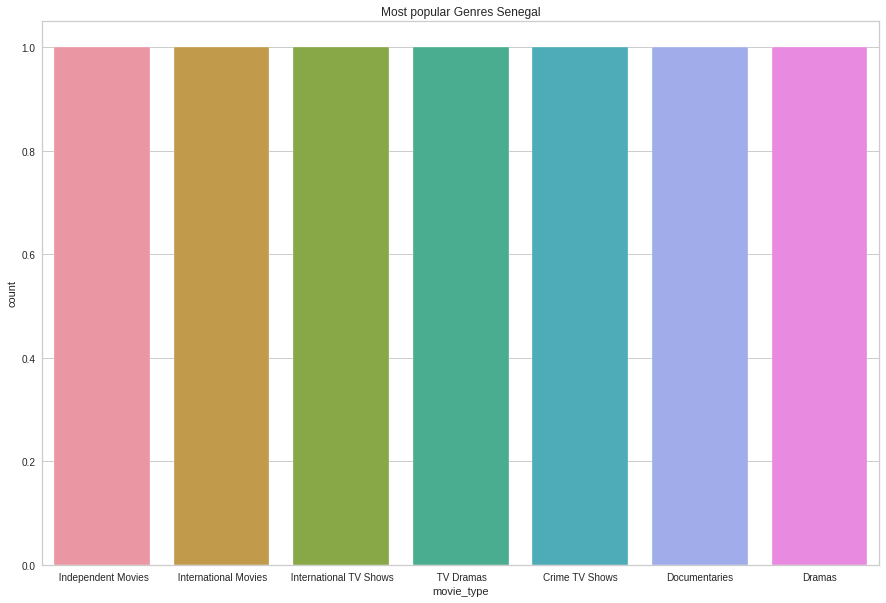

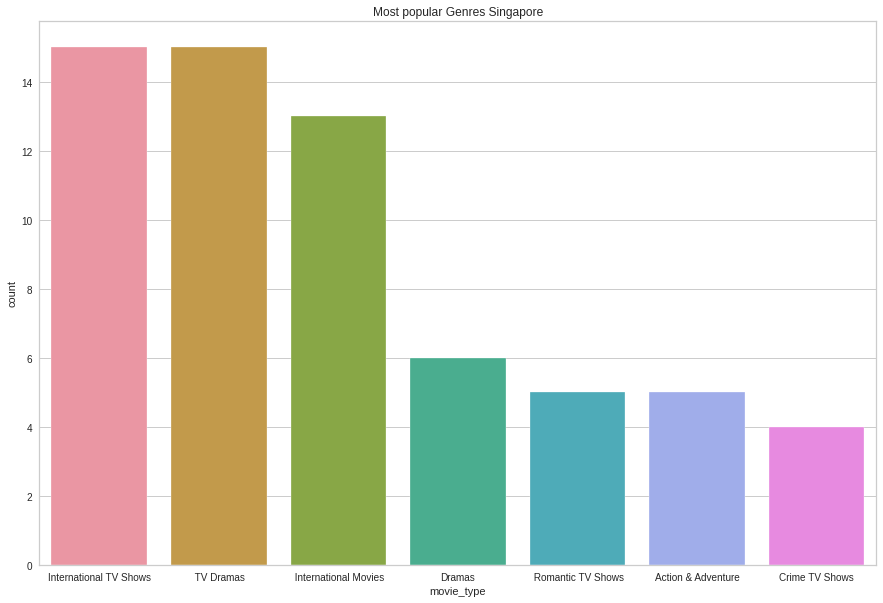

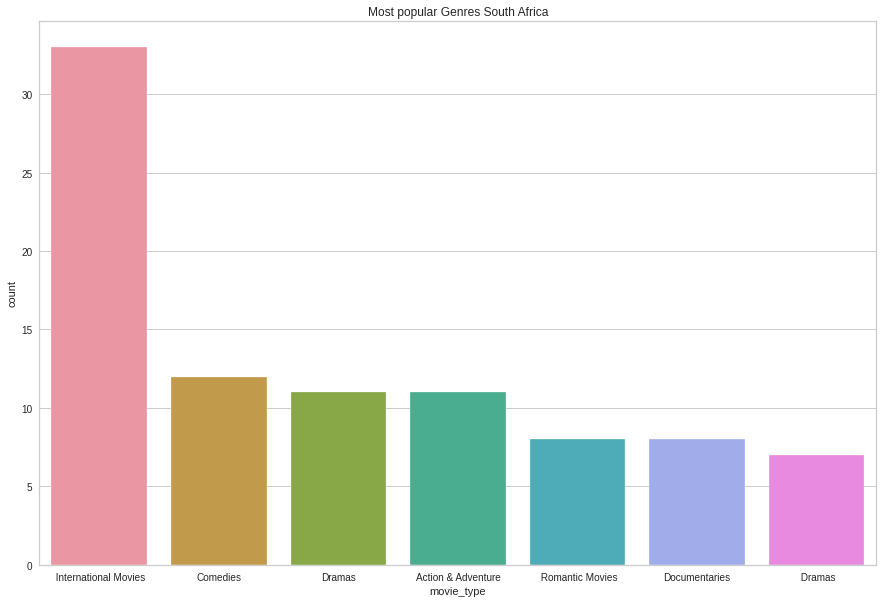

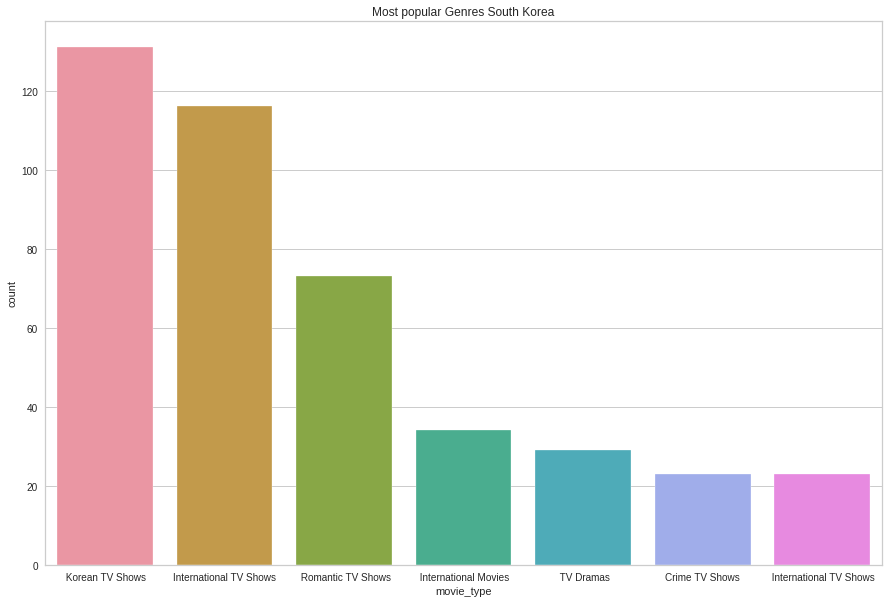

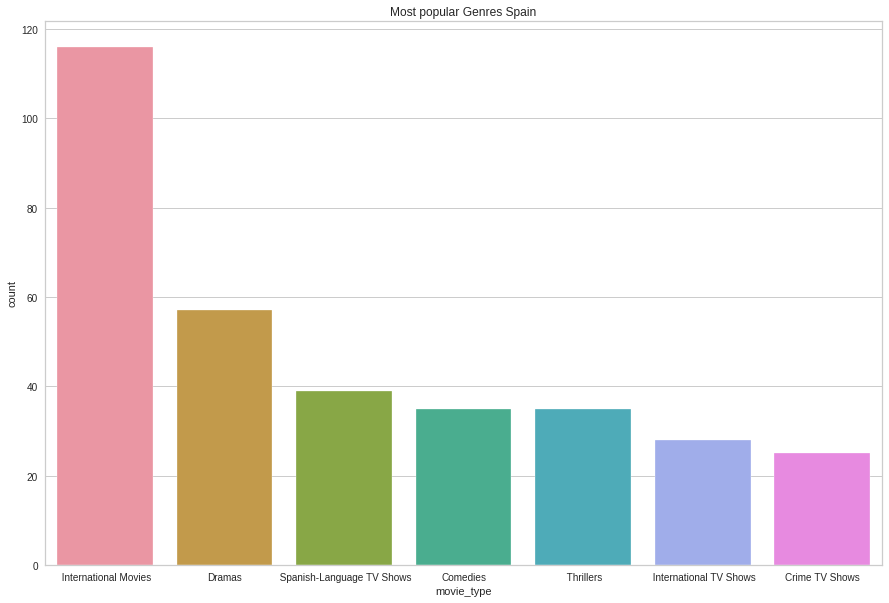

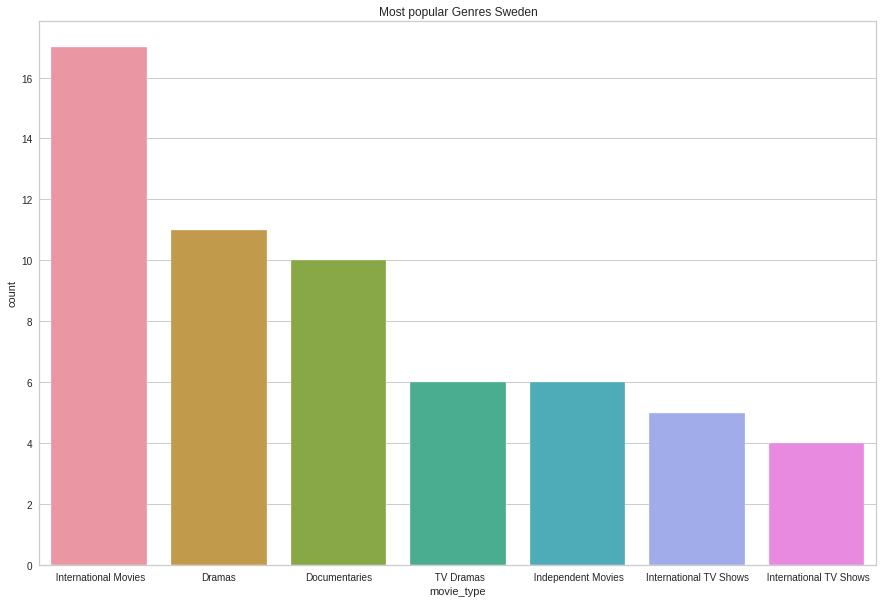

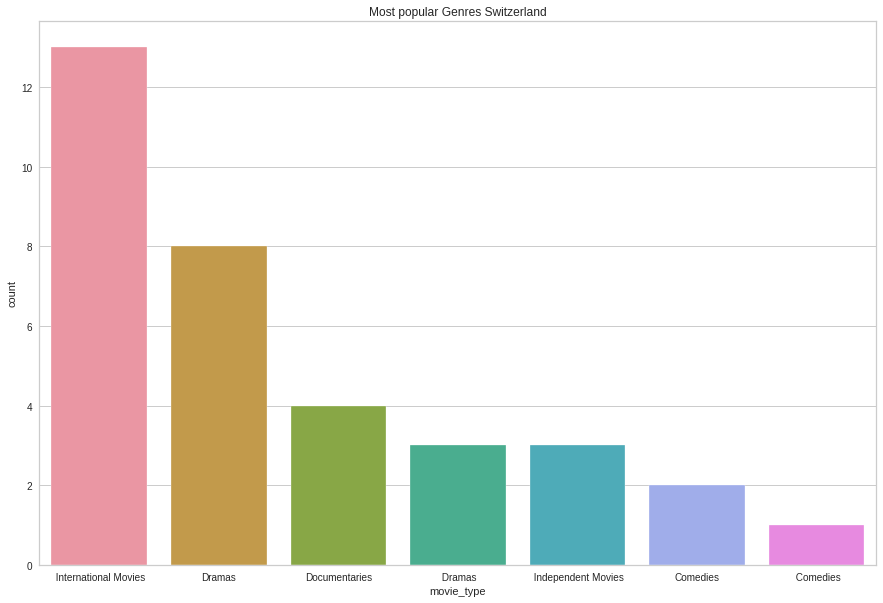

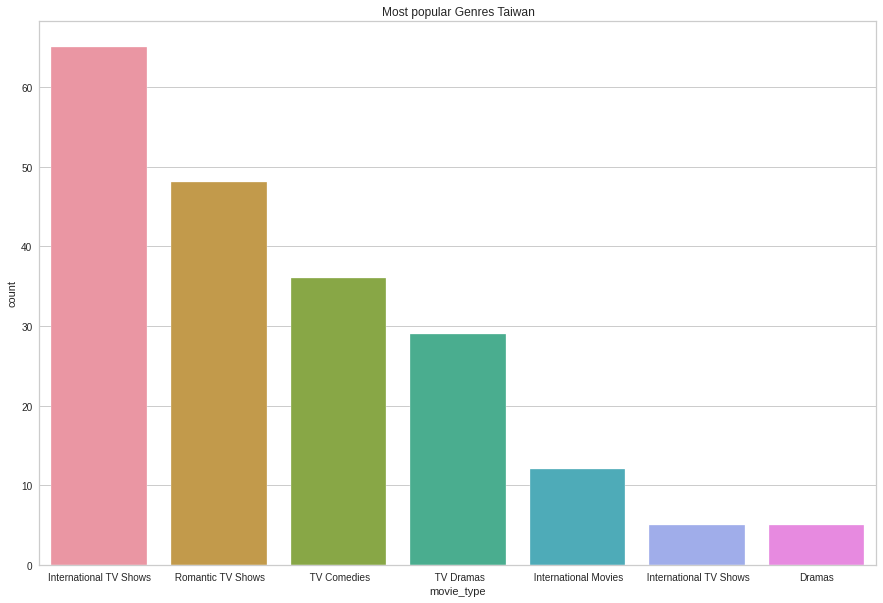

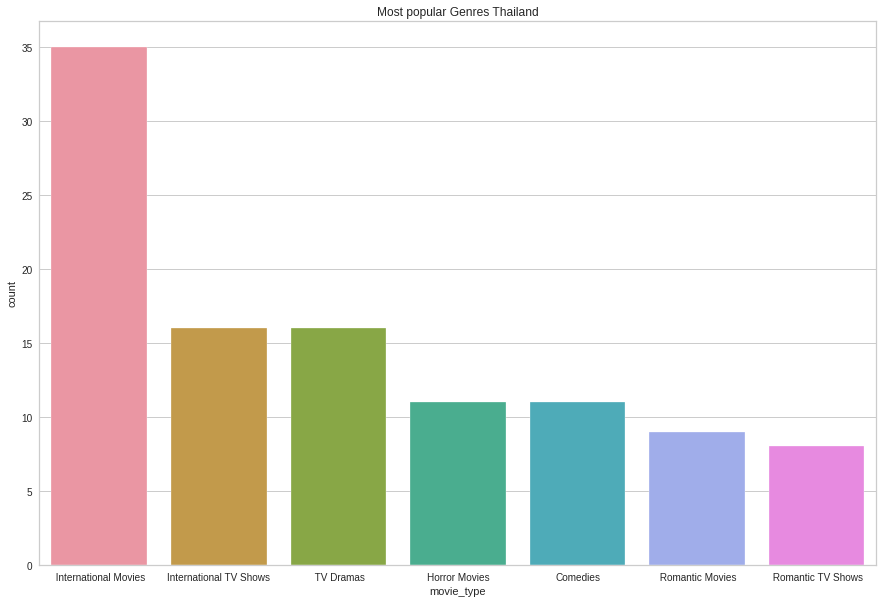

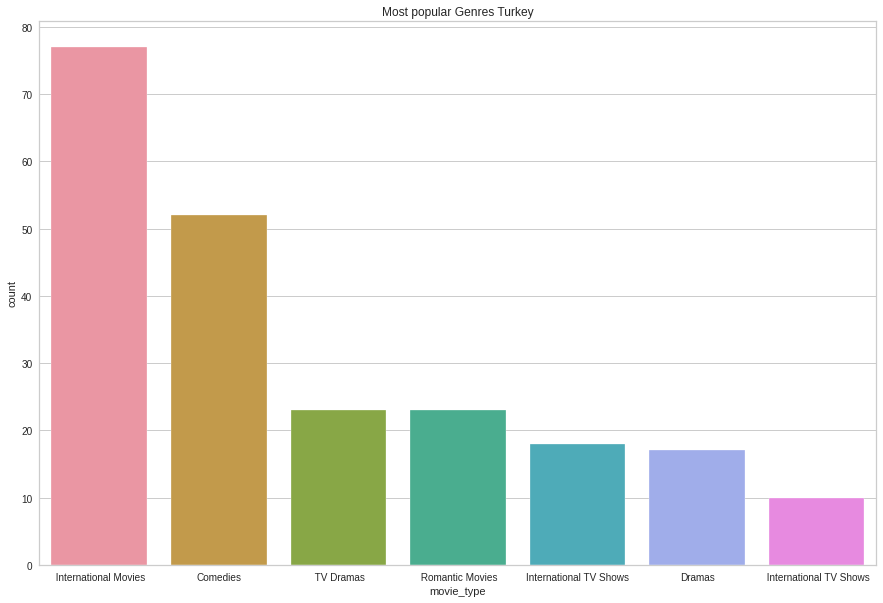

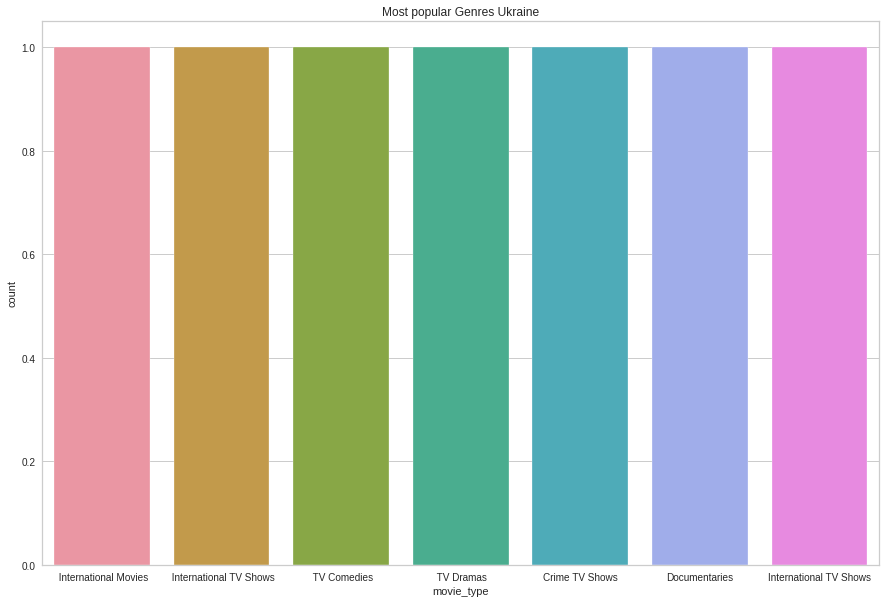

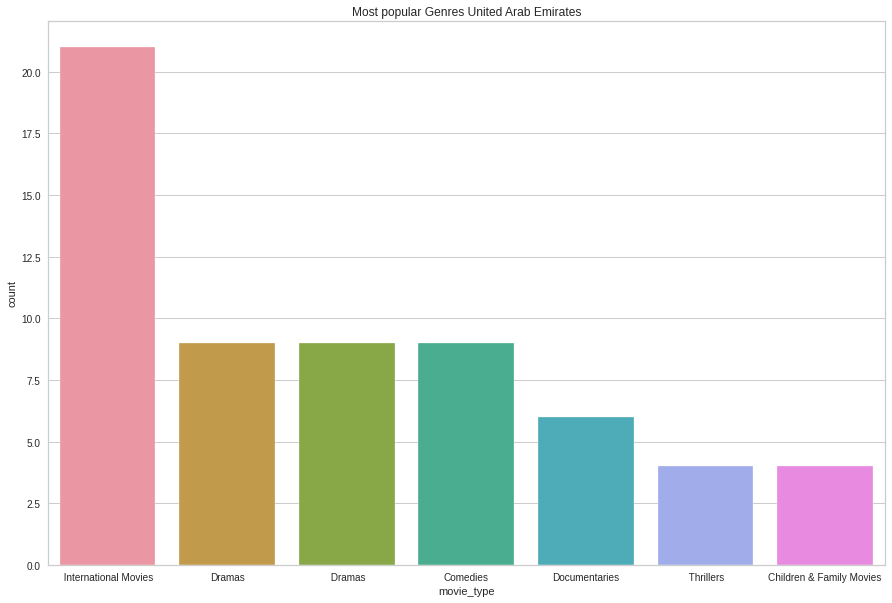

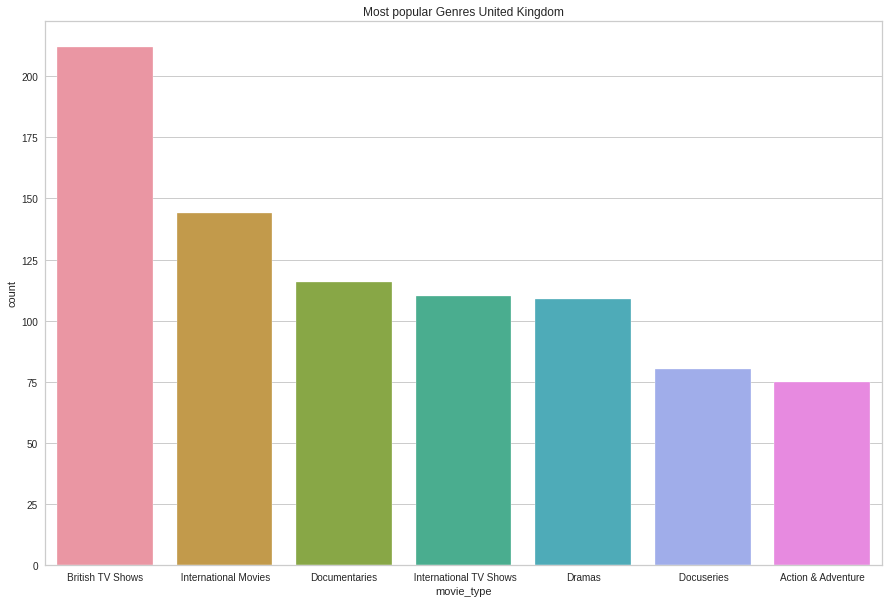

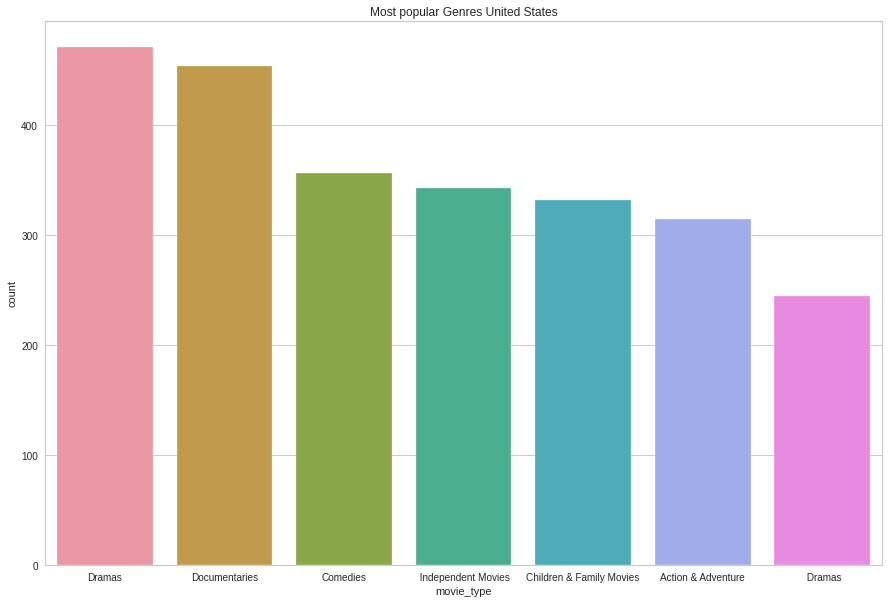

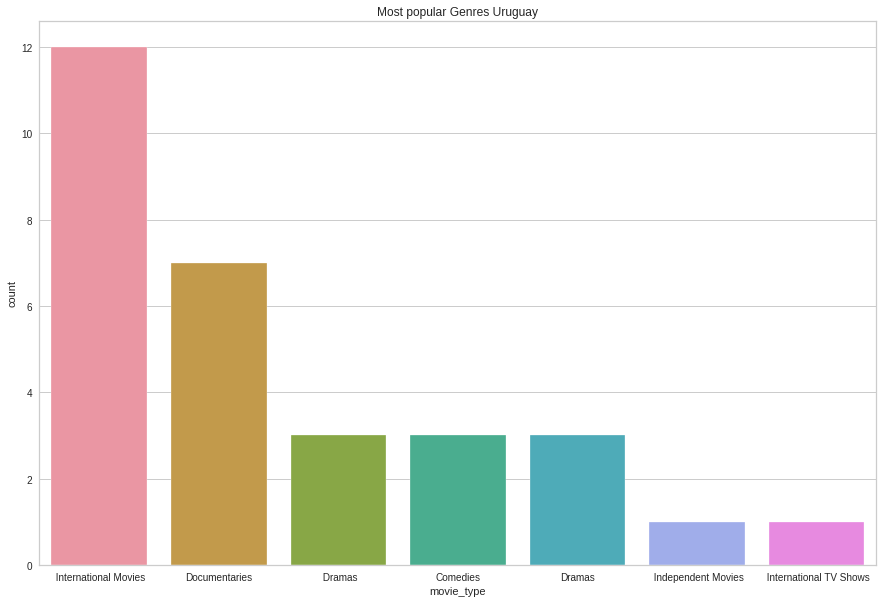

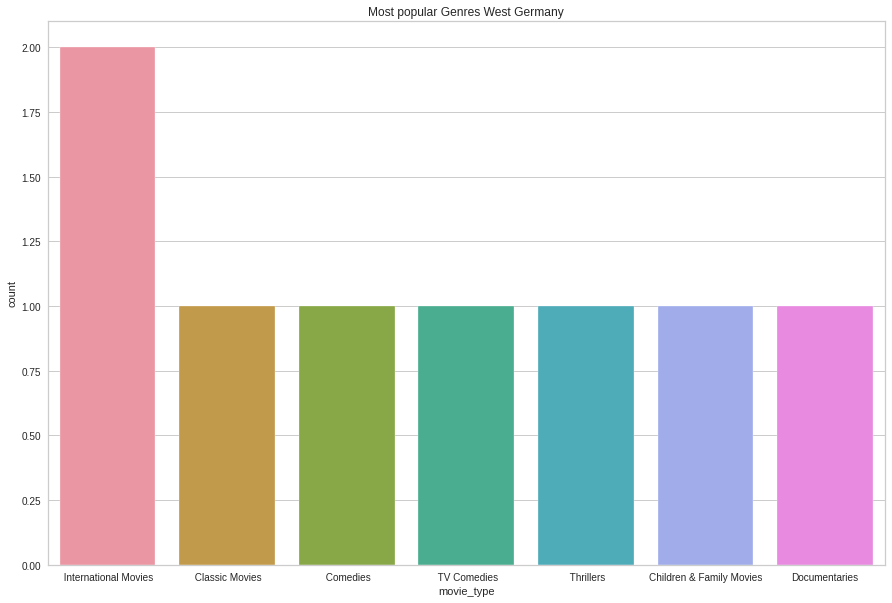

In [ ]:
country_list = ['Australia', 'Senegal', 'United Arab Emirates', 'Italy', 'France', 
                'Czech Republic', 'Finland', 'New Zealand', 'Not Known', 'Saudi Arabia', 'Brazil', 'Kuwait', 'Norway', 
                'Chile', 'Pakistan', 'Germany', 'United States', 'Lebanon', 'Singapore', 'Turkey', 'Jordan', 'Spain', 'Colombia',
                'Philippines', 'Ukraine', 'Switzerland', 'China', 'Croatia', 'United Kingdom', 'Malaysia', 'Canada', 'Mexico', 'Poland', 
                'Netherlands', 'Israel', 'Belgium', 'Indonesia', 'Greece', 'South Korea', 'Nigeria', 'India', 'Uruguay', 'Argentina', 'Japan', 
                'Russia', 'Iceland', 'Ireland', 'Luxembourg', 'Thailand', 
                'Hungary', 'Malta', 'Taiwan', 'Denmark', 'Egypt', 'Hong Kong', 'South Africa', 'Sweden', 'Austria', 'West Germany']
country_list = sorted(country_list)

for country in country_list:
  popular_Genres_Different_Countries(country)


# ***Text based clustering***

In [ ]:
netflix_clustering = data.copy()

In [ ]:
# Replacing and dropping null values
data['director'].fillna('Not Known', inplace = True)
data['cast'].fillna('Not Known', inplace = True)
data['country'].fillna('Not Known', inplace = True)
data['date_added'].fillna('Not Known', inplace = True)
data['rating'].fillna('Not Known', inplace = True)

In [ ]:
# added new column named date added year
def date_added(x):
  if x == 'Not Known':
    return 'Not Known'
  else:
    return x[-4:] 

netflix_clustering['added_year']  = netflix_clustering['date_added'].apply(date_added)

In [ ]:
netflix_clustering.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,TV Show,3%,Not Known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [ ]:
# checking data shape
netflix_clustering.shape

(7787, 13)

In [ ]:
# checking columns
netflix_clustering.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_year'],
      dtype='object')

In [ ]:
netflix_clustering.duplicated().sum()

0

In [ ]:

# combining textual columns

netflix_clustering['combined_text'] = netflix_clustering['description']+netflix_clustering['listed_in']+netflix_clustering['rating']+netflix_clustering['director']+netflix_clustering['cast']+netflix_clustering['country']

In [ ]:
netflix_clustering['combined_text'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MANot KnownJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazil'

In [ ]:

# function to change data to lowercase and perform pattern change
def textpattern(text):
  return re.sub(r"[^a-zA-Z ]","",str(text)).lower()

**Funtion to remove punctuation**

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# remove punctuation
netflix_clustering['combined_text'] = netflix_clustering['combined_text'].apply(remove_punctuation)
netflix_clustering['combined_text'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalorInternational TV Shows TV Dramas TV SciFi  FantasyTVMANot KnownJoão Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zezé Motta Celso FrateschiBrazil'

In [ ]:
# stop words and stemmer
import nltk
nltk.download('stopwords')
stemmer = SnowballStemmer('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# # extracting the stopwords from nltk library
stopwords = stopwords.words('english')
# # displaying the stopwords
np.array(stopwords)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
print("Number of stopwords: ", len(stopwords))

Number of stopwords:  179


**Function to remove stopwords**

In [ ]:
def stopword(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stopwords]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# remove stopword
netflix_clustering['combined_text'] = netflix_clustering['combined_text'].apply(stopword)
netflix_clustering['combined_text'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi fantasytvmanot knownjoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

In [ ]:

#using tfidf transforming data

tfidf = TfidfVectorizer(max_df = 0.9,min_df = 1,max_features=12000)
x= tfidf.fit_transform(netflix_clustering['combined_text'])

In [ ]:
x

<7787x12000 sparse matrix of type '<class 'numpy.float64'>'
	with 186314 stored elements in Compressed Sparse Row format>

In [ ]:
# using PCA to project data to lower dimensional space

pca = PCA(random_state=42)
pca.fit(x.toarray())

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

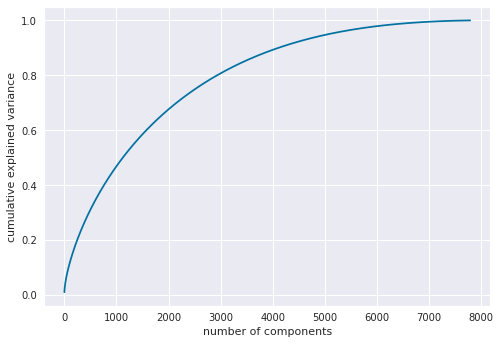

In [ ]:
# Explained variance for different number of components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# applying PCA to transform the data into 4000 components selected by checking the above graph . explained variance for 4000 components is around 0.9

pca = PCA(n_components=4000,random_state=42)
pca.fit(x.toarray())
transformed_data = pca.fit_transform(x.toarray())
transformed_data.shape
     

(7787, 4000)

In [ ]:
#data transformed 

transformed_data

array([[ 1.58619647e-01, -1.94102778e-02, -2.03243114e-02, ...,
        -2.33963731e-03,  8.21813248e-03, -1.69312821e-02],
       [-4.31501112e-02, -1.18972763e-02,  1.97582682e-02, ...,
         7.73977480e-04,  1.10849056e-02, -4.92620099e-03],
       [-4.44766975e-02, -4.63237419e-02, -2.74464430e-03, ...,
         1.00679150e-02,  6.52096632e-03, -5.14774025e-03],
       ...,
       [-5.97610621e-02,  1.81956899e-02,  8.96747756e-02, ...,
        -4.70561611e-03, -1.16528687e-02,  2.91861395e-03],
       [ 6.80849313e-02,  3.19926084e-02,  1.60078843e-02, ...,
        -6.83269080e-04, -9.12881994e-05,  4.94932529e-03],
       [-6.97664175e-02,  2.16608092e-01,  3.92545189e-02, ...,
        -1.07776638e-02, -2.05929774e-03,  3.01989599e-03]])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

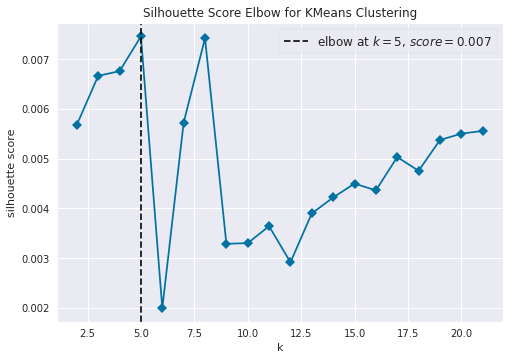

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# finding optimal number of clusters for K Means

# Instantiate the clustering model and visualizer
model = KMeans(tol=1e-4,random_state = 42)
visualizer = KElbowVisualizer(model, k=(2,22), metric='silhouette', timings=False)

visualizer.fit(transformed_data)
visualizer.show()  

In [ ]:
# fitting kmeans to transformed data

kmeans= KMeans(n_clusters=5,max_iter=1000,tol=1e-4, n_init=1,random_state= 42)
kmeans.fit(transformed_data)

KMeans(max_iter=1000, n_clusters=5, n_init=1, random_state=42)

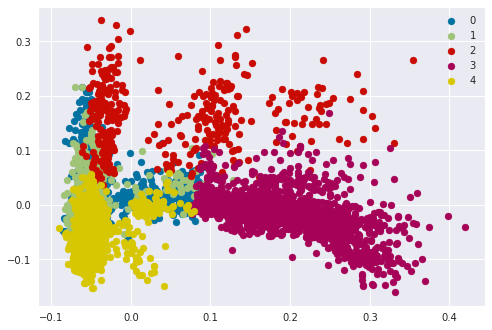

In [ ]:
# plotting clusters

label = kmeans.fit_predict(transformed_data)
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(transformed_data[label == i , 0] , transformed_data[label == i , 1] , label = i)
plt.legend()
plt.show()


In [ ]:
# created new column with cluster number

netflix_clustering['cluster'] = kmeans.labels_

In [ ]:
netflix_clustering.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,combined_text,cluster
0,s1,TV Show,3%,Not Known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,future elite inhabit island paradise far crowd...,3
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,devastating earthquake hits mexico city trappe...,4
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,army recruit found dead fellow soldiers forced...,4
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,postapocalyptic world ragdoll robots hide fear...,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,brilliant group students become cardcounting e...,0


In [ ]:

# value count for different clusters

netflix_clustering.cluster.value_counts()

0    2969
4    2414
3    1296
1     729
2     379
Name: cluster, dtype: int64

Text(0, 0.5, 'size')

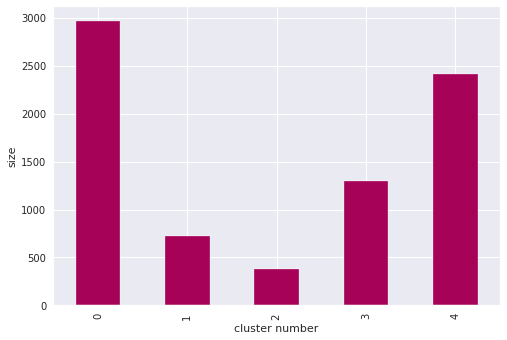

In [ ]:
# Size of clusters formed

netflix_clustering.cluster.value_counts().sort_index().plot(kind='bar', color='m')
plt.xlabel('cluster number')
plt.ylabel('size')
     

In [ ]:
netflix_clustering = netflix_clustering.drop('show_id', axis = 1)


#**Content Based Recommender system using Cosine Similarity**

In [ ]:
netflix_clustering.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,combined_text,cluster
0,TV Show,3%,Not Known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,future elite inhabit island paradise far crowd...,3
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,devastating earthquake hits mexico city trappe...,4
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,army recruit found dead fellow soldiers forced...,4
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,postapocalyptic world ragdoll robots hide fear...,0
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,brilliant group students become cardcounting e...,0


In [ ]:
# picking some important columns to be used for content based recommendation system

df = pd.DataFrame()
from ast import literal_eval
cols = ['title','cast','director','rating','listed_in']
for col in cols:
  df[col] = netflix_clustering[col]

In [ ]:
# Performing normal data cleaning, converting to lower case
for col in ['cast','director','rating','listed_in']:
  df[col] = df[col].apply(textpattern)

In [ ]:
df.head(5)

,title,cast,director,rating,listed_in
0,3%,joo miguel bianca comparato michel gomes rodol...,not known,tvma,international tv shows tv dramas tv scifi fan...
1,7:19,demin bichir hctor bonilla oscar serrano azali...,jorge michel grau,tvma,dramas international movies
2,23:59,tedd chan stella chung henley hii lawrence koh...,gilbert chan,r,horror movies international movies
3,9,elijah wood john c reilly jennifer connelly ch...,shane acker,pg,action adventure independent movies scifi fa...
4,21,jim sturgess kevin spacey kate bosworth aaron ...,robert luketic,pg,dramas


In [ ]:
#creating new column by combining required text columns

df['combined_text'] = df['cast']+df['director']+df['rating']+df['listed_in']

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***